<a href="https://colab.research.google.com/github/tahirp/classification_benchmarking/blob/main/classifier_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

## Answer (Problem 1)

Based on the **Materials and Methods** section of the Moro et al. (2014) paper, the dataset represents data collected from **17** marketing campaigns.

### Data Analysis Key Findings
- The dataset aggregates records from **17 distinct marketing campaigns** conducted by a Portuguese banking institution.
- This finding is based on the academic context provided by the Moro et al. (2014) paper rather than a direct statistical calculation in this step.

### Insights or Next Steps
- Understanding that the data spans multiple campaigns is critical, as it implies potential variations in market conditions or strategies that could influence the success rates of phone calls.
- A logical next step would be to investigate if the dataset contains temporal variables or specific identifiers that allow for the comparison of performance across these 17 different campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [82]:
marketing_df = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';')

In [83]:
marketing_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age : (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Missing values**

Calculate the total number of missing values (NaNs) for each column in the marketing DataFrame.


In [84]:
missing_values_count = marketing_df.isnull().sum()
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


* The count for null values is zero, and this indicates that there are no explicit NaN (Not a Number) missing values in the dataset.

* However, the problem description clearly states that several categorical features (job, marital, education, default, housing, loan) contain the value 'unknown'. These 'unknown' values effectively represent missing information and will need to be handled appropriately before modeling. We'll need to decide whether to treat them as a separate category, impute them, or something else.

**Numerical Features (Summary):**

The following features are numerical:

- **age**: `int64`
- **duration**: `int64`
- **campaign**: `int64`
- **pdays**: `int64`
- **previous**: `int64`
- **emp.var.rate**: `float64`
- **cons.price.idx**: `float64`
- **cons.conf.idx**: `float64`
- **euribor3m**: `float64`
- **nr.employed**: `float64`

**Categorical Features (Summary):**

The following features are categorical:

- **job**: `object`
- **marital**: `object`
- **education**: `object`
- **default**: `object`
- **housing**: `object`
- **loan**: `object`
- **contact**: `object`
- **month**: `object`
- **day_of_week**: `object`
- **poutcome**: `object`
- **y** (Target Variable): `object`

**Unique Values**

Examine the unique values in categorical columns to understand their cardinality (number of unique entries) and identify any inconsistencies or potential data entry errors.

In [85]:
# Get the number of unique values for each column
unique_counts = marketing_df.nunique()

print("\nNumber of unique values per column (sorted descending by count):")
print(unique_counts.sort_values(ascending=False))


Number of unique values per column (sorted descending by count):
duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.price.idx      26
cons.conf.idx       26
job                 12
nr.employed         11
emp.var.rate        10
month               10
education            8
previous             8
day_of_week          5
marital              4
default              3
housing              3
poutcome             3
loan                 3
contact              2
y                    2
dtype: int64


This allows us to quickly see which columns have very few unique values (e.g., binary flags) and which ones have a high cardinality (e.g., `duration` or `age`), which is crucial for deciding on appropriate encoding or binning strategies.

## Analyze 'unknown' Values in Categorical Features

Quantify the prevalence of 'unknown' values in categorical features (job, marital, education, default, housing, loan). This will involve calculating the percentage of 'unknown' entries for each affected column to understand the extent of this missing information.


In [86]:
categorical_features_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

print("Prevalence of 'unknown' values in categorical features:")
for feature in categorical_features_with_unknown:
    unknown_count = (marketing_df[feature] == 'unknown').sum()
    total_rows = len(marketing_df)
    percentage_unknown = (unknown_count / total_rows) * 100
    print(f"- {feature}: {unknown_count} 'unknown' values ({percentage_unknown:.2f}%)")

Prevalence of 'unknown' values in categorical features:
- job: 330 'unknown' values (0.80%)
- marital: 80 'unknown' values (0.19%)
- education: 1731 'unknown' values (4.20%)
- default: 8597 'unknown' values (20.87%)
- housing: 990 'unknown' values (2.40%)
- loan: 990 'unknown' values (2.40%)


### Summary of 'Unknown' Values

The analysis of 'unknown' values in the specified categorical features reveals varying levels of missing information:

*   **job**: Only 0.80% of entries are 'unknown', which is a relatively small proportion.
*   **marital**: A very low percentage (0.19%) of 'unknown' values, indicating this feature is largely complete.
*   **education**: Approximately 4.20% of the `education` entries are 'unknown'. This is a moderate amount that might warrant imputation or treating 'unknown' as its own category.
*   **default**: This feature has a significant portion of 'unknown' values, at 20.87%. This large percentage suggests that 'unknown' should likely be treated as a distinct category, or careful imputation strategies should be considered, as dropping these records would lead to substantial data loss.
*   **housing**: 2.40% of entries are 'unknown'.
*   **loan**: 2.40% of entries are 'unknown'.

These insights are crucial for deciding on appropriate data preprocessing strategies, such as whether to treat 'unknown' as a separate category, impute missing values, or discard records, especially for features like 'default' with a high prevalence of 'unknowns'.

## Visualize Categorical Feature Distributions and Relationship with Target Variable

Visualize the distribution of each categorical feature and its relationship with the target variable 'y' using bar plots.

1.  Identify all categorical features in the `marketing_df` DataFrame.
2.  For each categorical feature, create a bar plot showing its distribution.
3.  Additionally, for each categorical feature, create a bar plot showing the proportion of 'yes' responses for the target variable 'y' within each category of the feature. This will help understand the relationship between the categorical feature and the client's subscription to a term deposit.

Generating bar plots for categorical features...


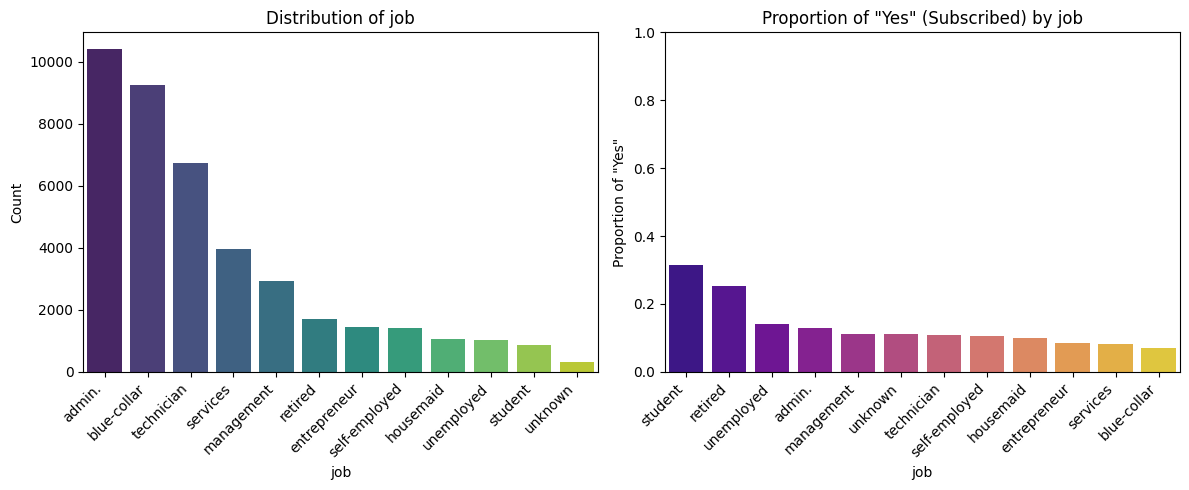

<Figure size 640x480 with 0 Axes>

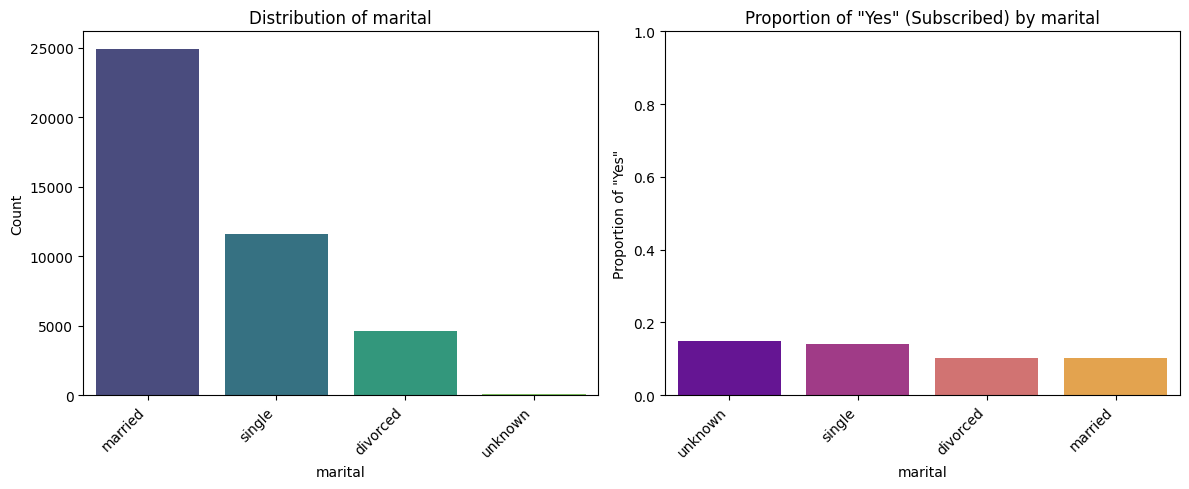

<Figure size 640x480 with 0 Axes>

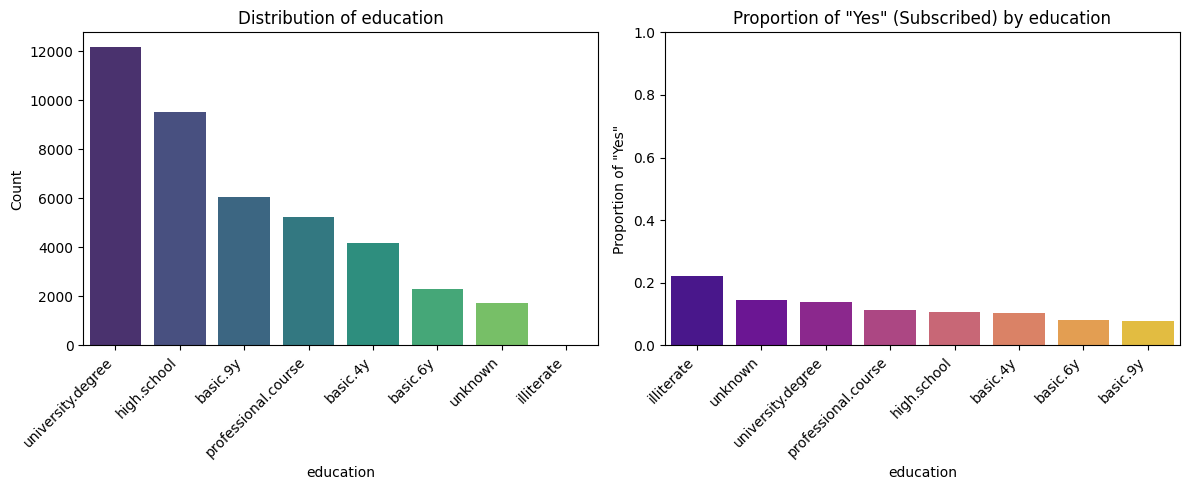

<Figure size 640x480 with 0 Axes>

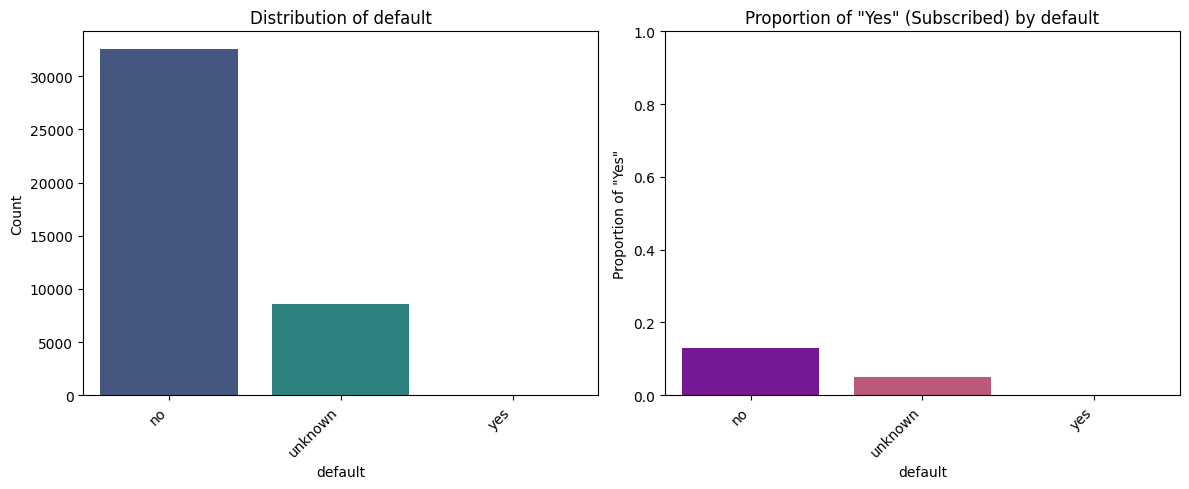

<Figure size 640x480 with 0 Axes>

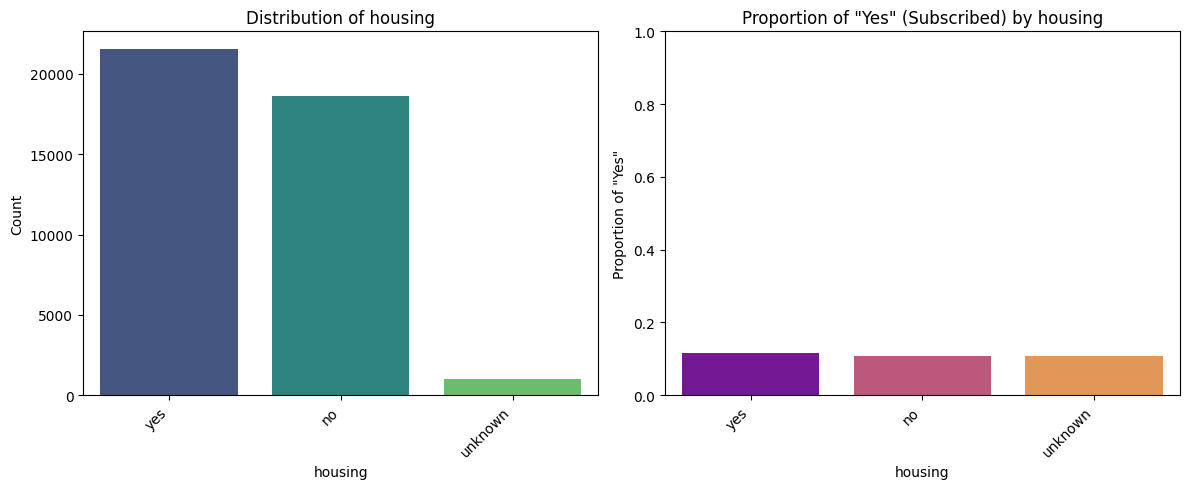

<Figure size 640x480 with 0 Axes>

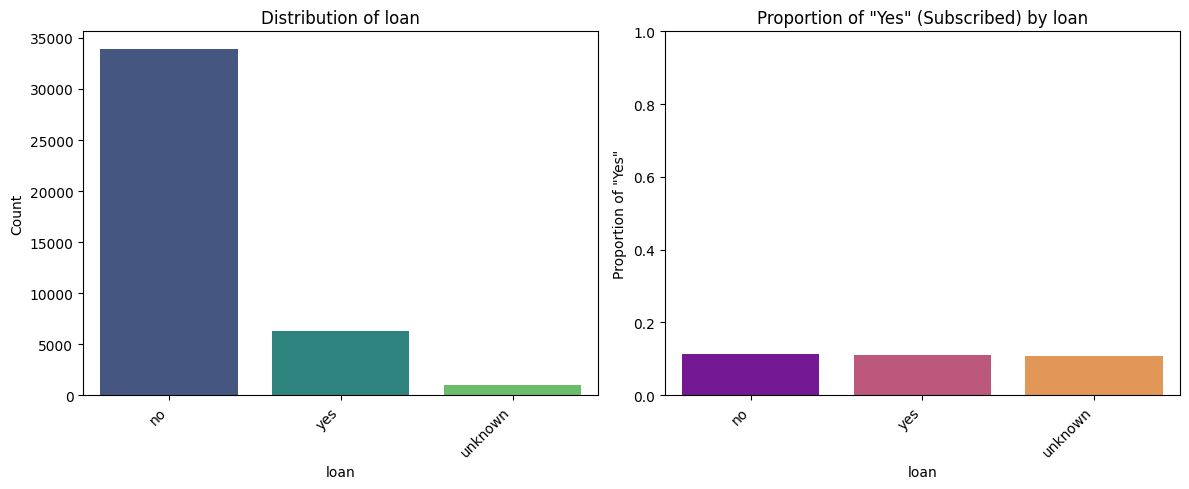

<Figure size 640x480 with 0 Axes>

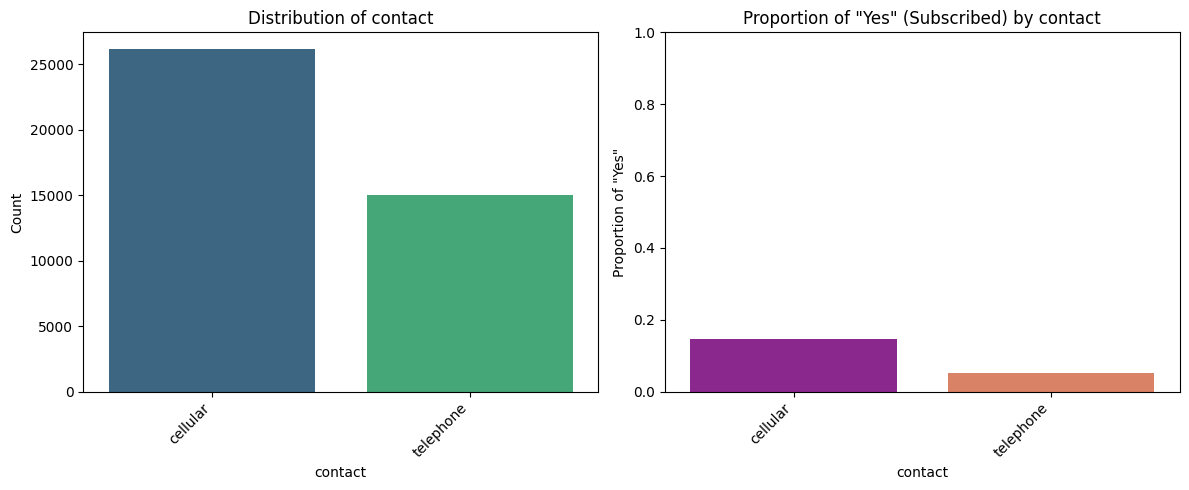

<Figure size 640x480 with 0 Axes>

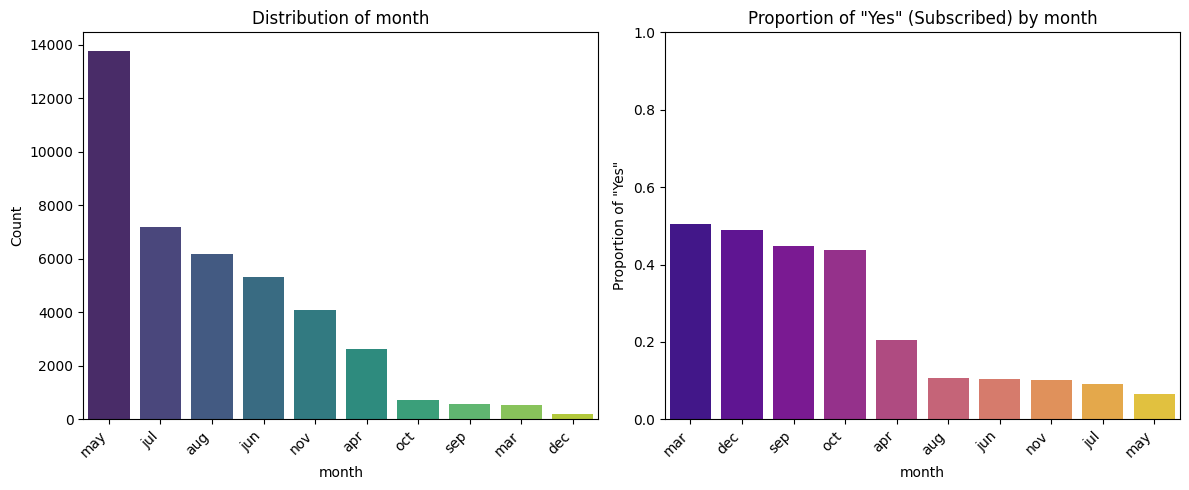

<Figure size 640x480 with 0 Axes>

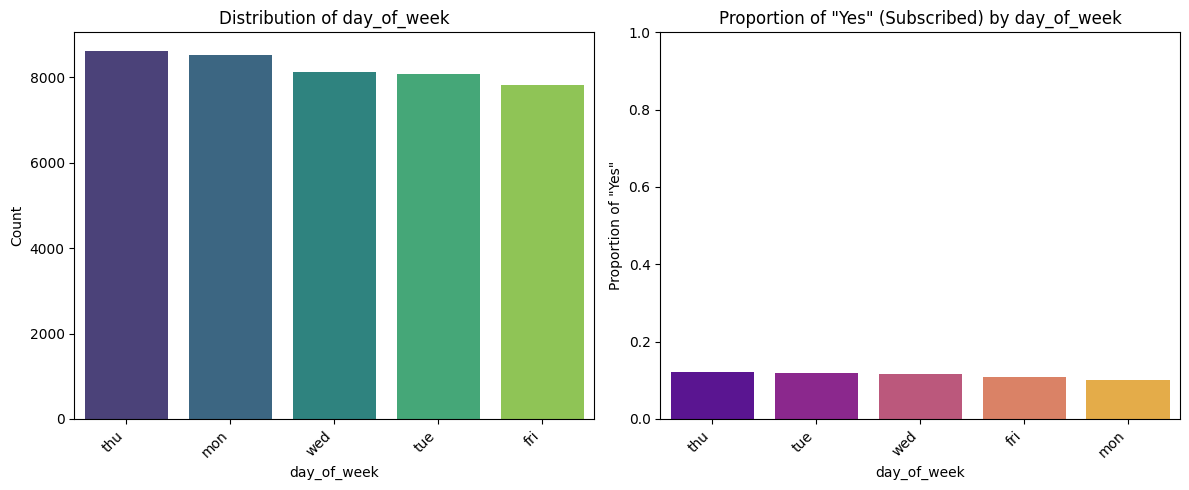

<Figure size 640x480 with 0 Axes>

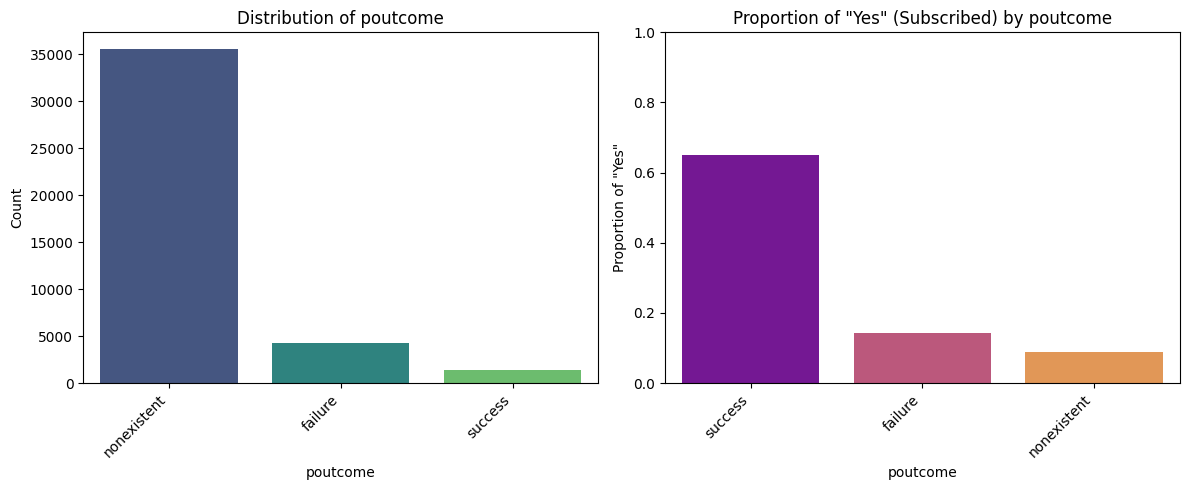

Finished generating bar plots for categorical features.


<Figure size 640x480 with 0 Axes>

In [87]:
# Identify categorical columns (excluding 'y' for the iteration, as 'y' is the target)
categorical_cols = marketing_df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'y']

# Encode the target variable 'y' to numerical (0 for 'no', 1 for 'yes')
marketing_df['y_encoded'] = marketing_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

print("Generating bar plots for categorical features...")

for col in categorical_cols:
    plt.figure(figsize=(12, 5))

    # Subplot 1: Distribution of the categorical feature
    plt.subplot(1, 2, 1)
    sns.countplot(data=marketing_df, x=col, palette='viridis', order=marketing_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Subplot 2: Proportion of 'y=yes' for each category
    plt.subplot(1, 2, 2)
    # Calculate the proportion of 'yes' for each category
    proportion_yes = marketing_df.groupby(col)['y_encoded'].mean().sort_values(ascending=False)
    sns.barplot(x=proportion_yes.index, y=proportion_yes.values, palette='plasma')
    plt.title(f'Proportion of "Yes" (Subscribed) by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion of "Yes"')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()
    plt.savefig('images/categorical_features_plot.png')

print("Finished generating bar plots for categorical features.")

## Analyze Numerical Features

Compute descriptive statistics for all numerical features and visualize their distributions using histograms or box plots.

1.  Identify all numerical features in the `marketing_df` DataFrame.
2.  Generate and display descriptive statistics (e.g., mean, median, standard deviation, min, max, quartiles) for these numerical features.
3.  For each numerical feature, create a histogram to visualize its distribution. Use appropriate bin sizes and titles.
4.  Creating box plots for numerical features to identify outliers, especially for features with a wide range of values.

In [88]:
print("Descriptive statistics for numerical features:")
print(marketing_df.describe())


Descriptive statistics for numerical features:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.62

## Visualize Numerical Features

Generating histograms and box plots for numerical features...


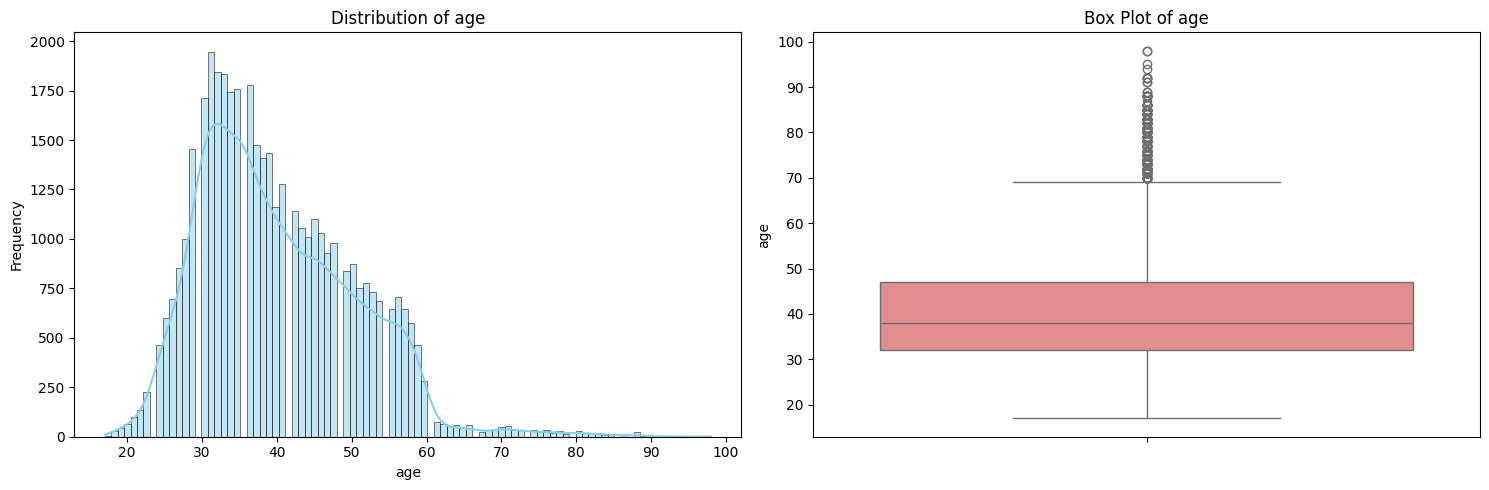

<Figure size 640x480 with 0 Axes>

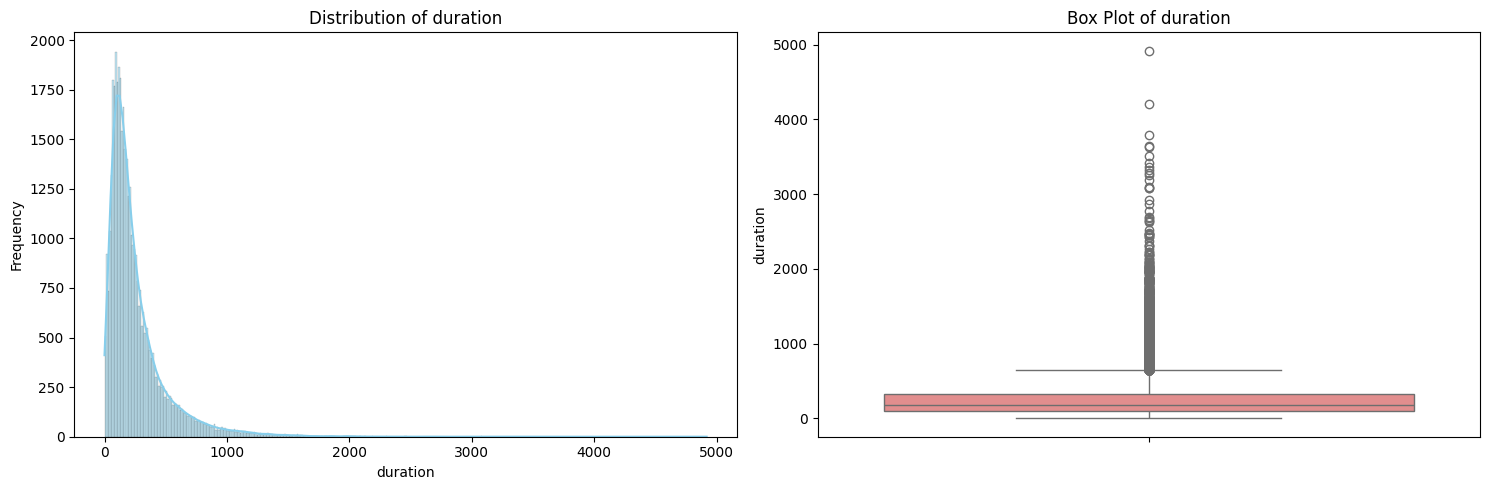

<Figure size 640x480 with 0 Axes>

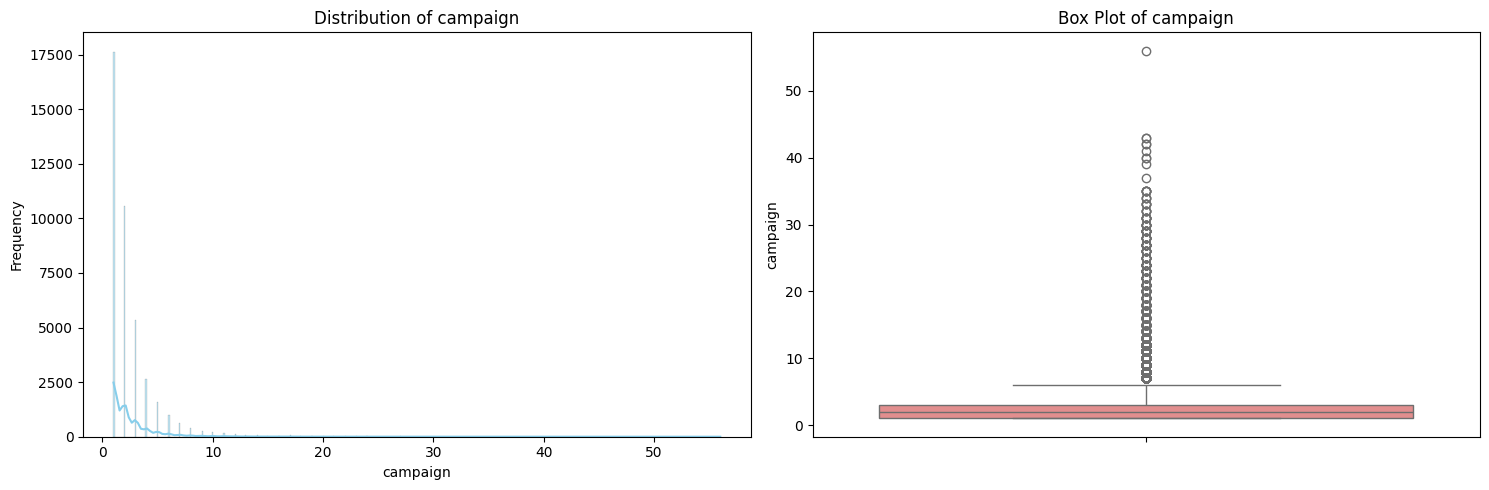

<Figure size 640x480 with 0 Axes>

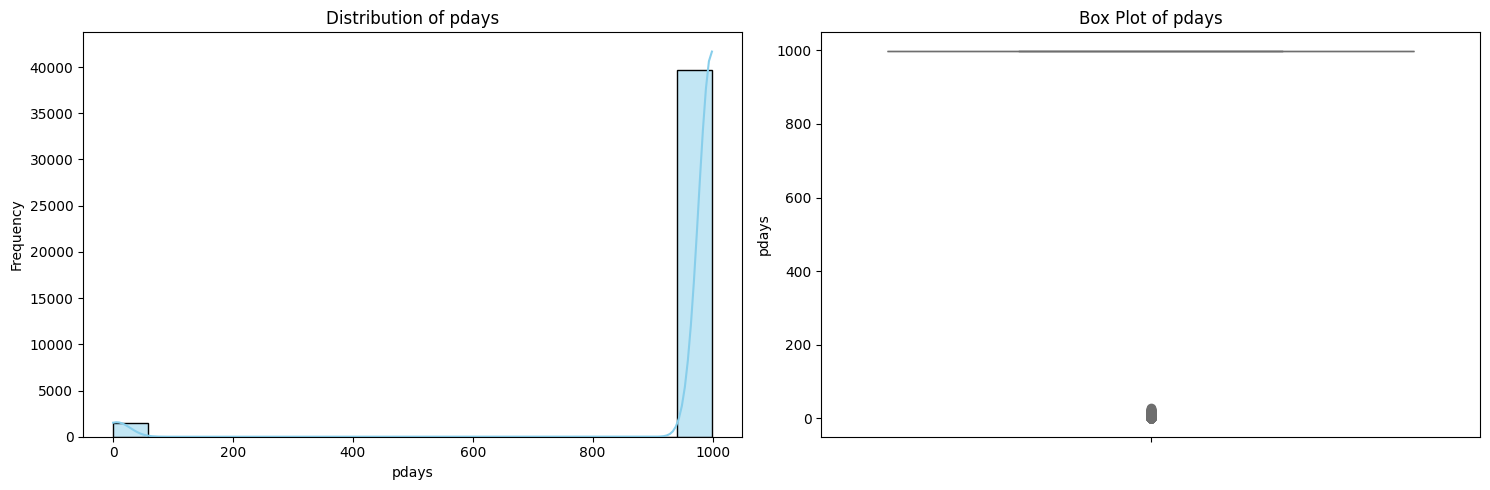

<Figure size 640x480 with 0 Axes>

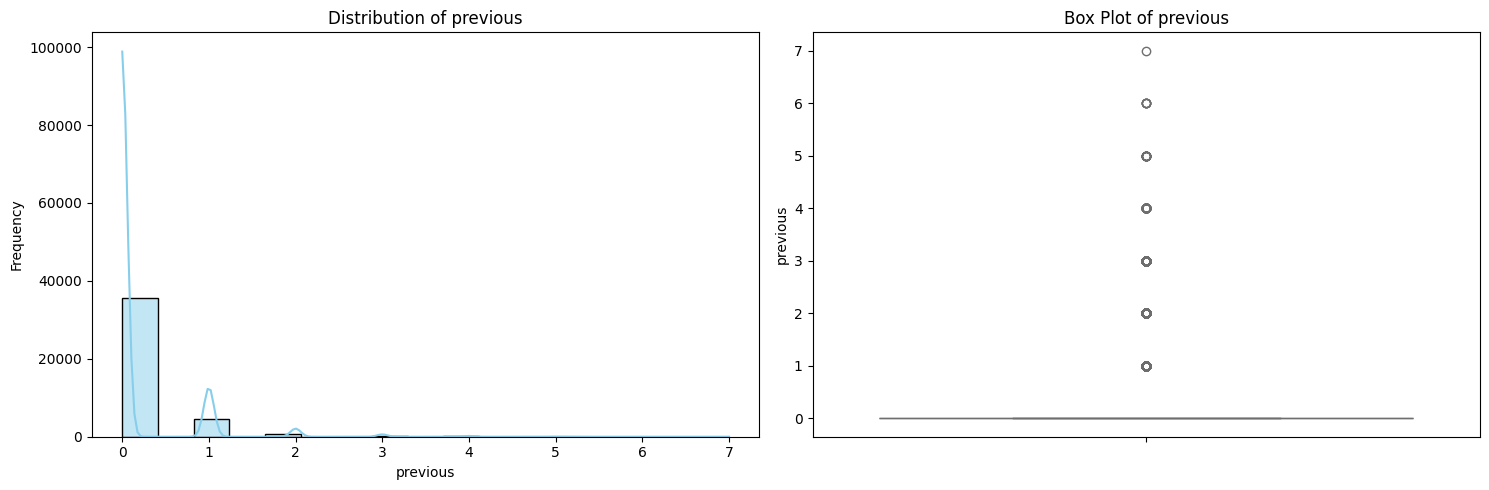

<Figure size 640x480 with 0 Axes>

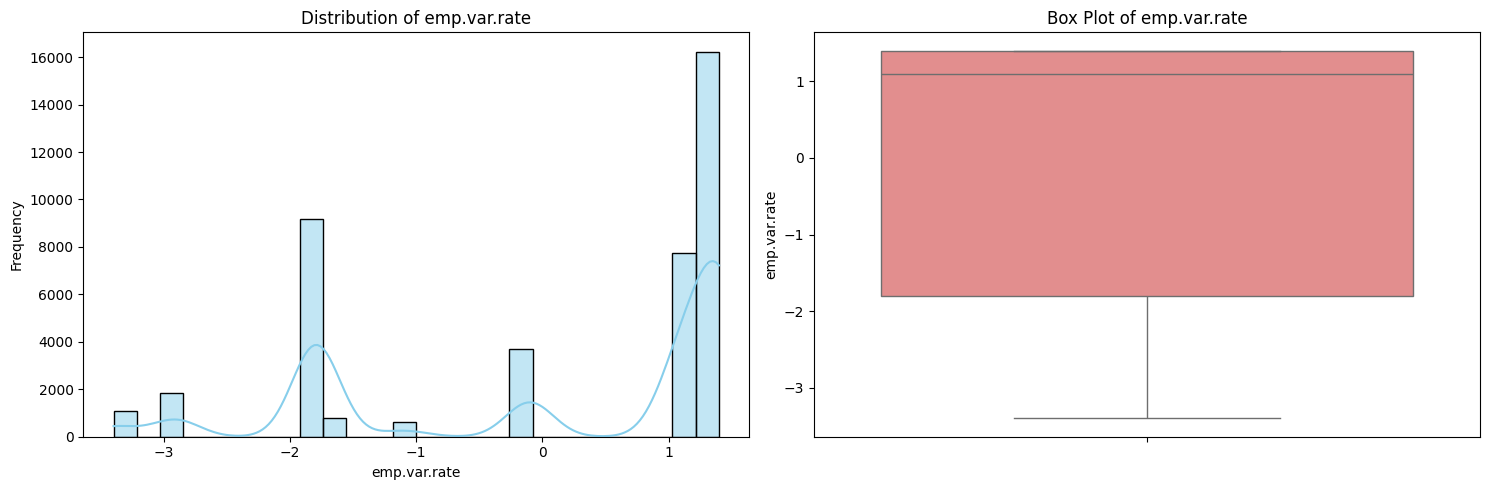

<Figure size 640x480 with 0 Axes>

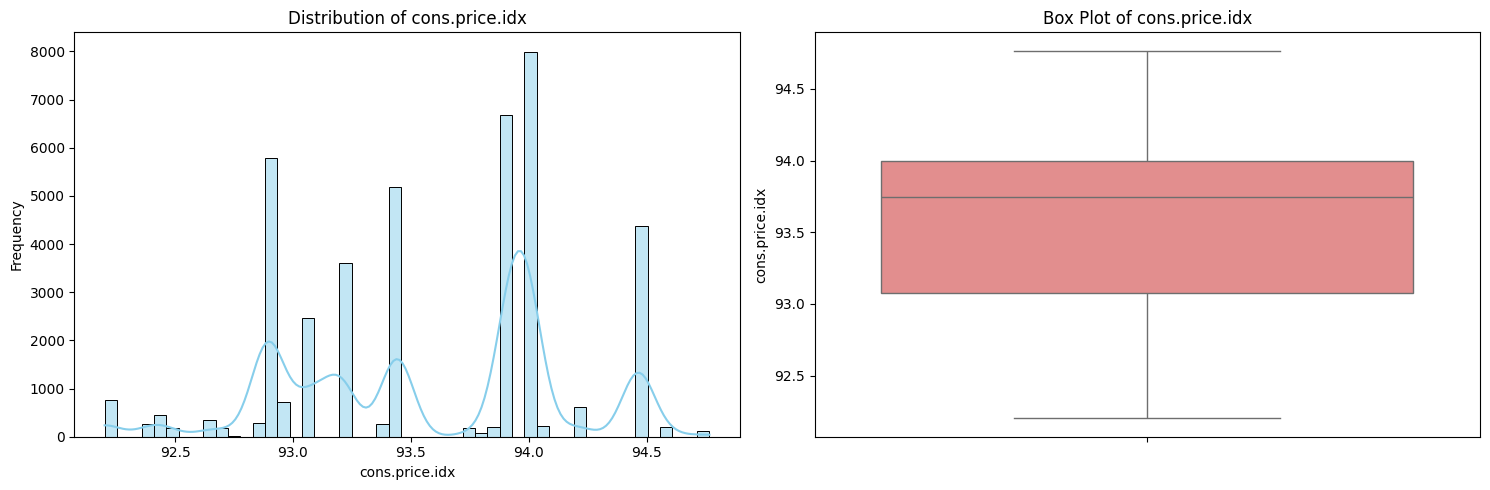

<Figure size 640x480 with 0 Axes>

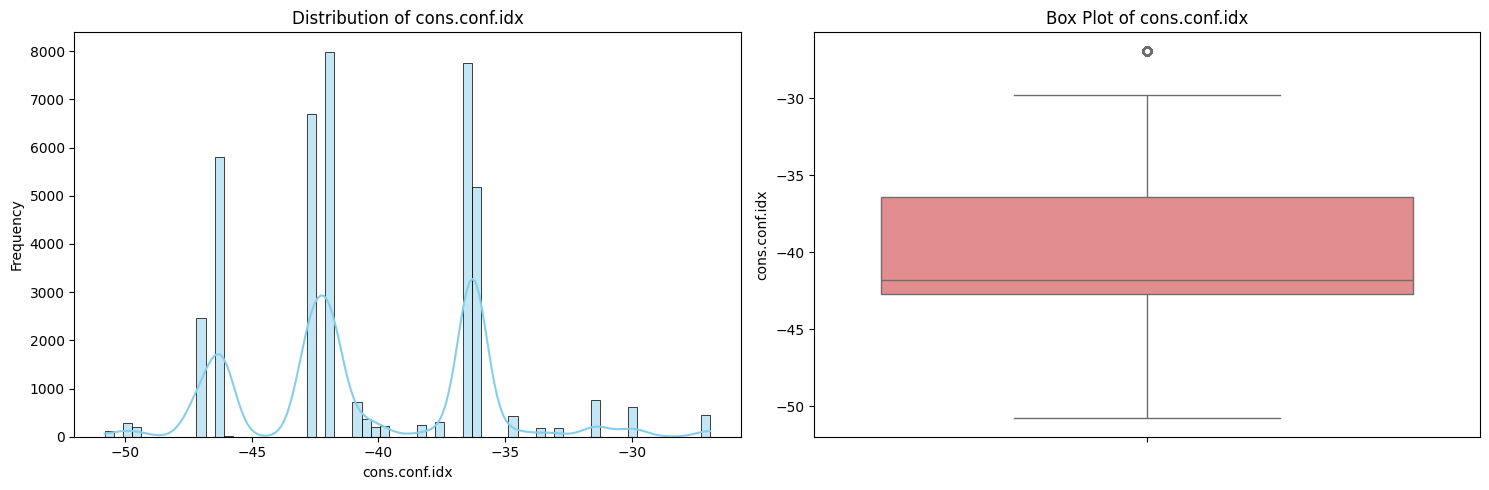

<Figure size 640x480 with 0 Axes>

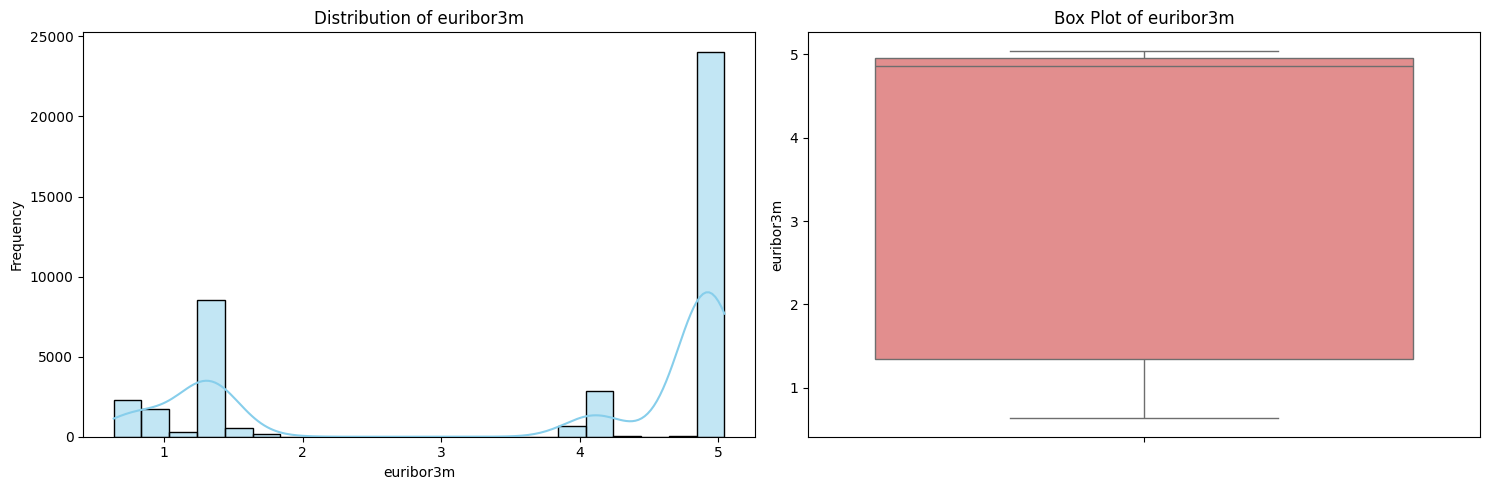

<Figure size 640x480 with 0 Axes>

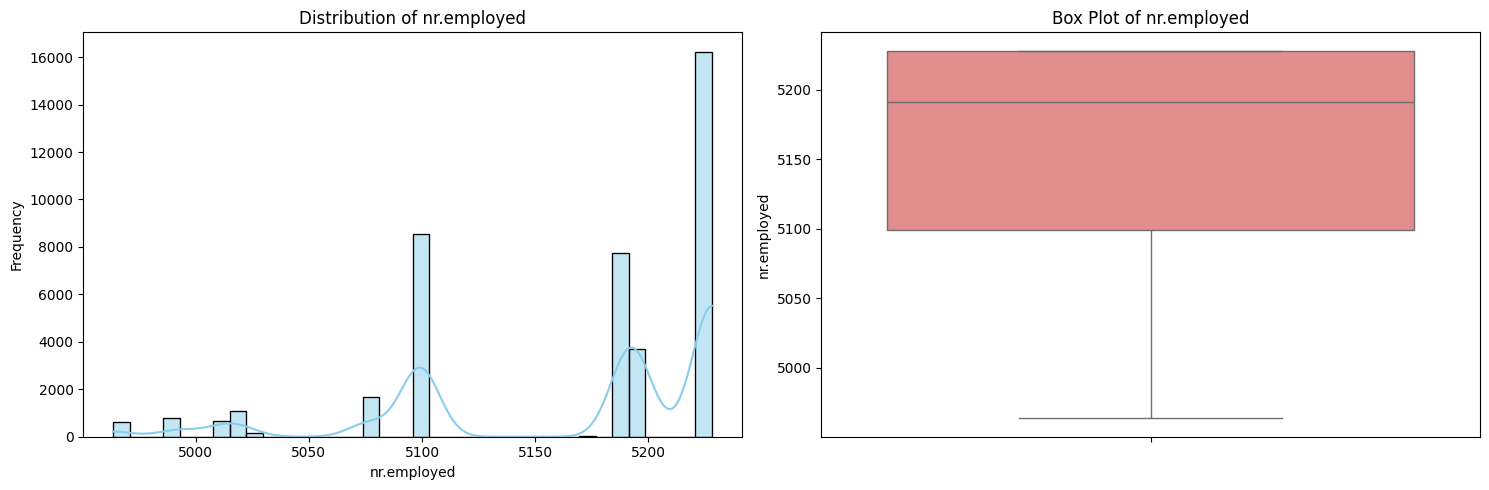

Finished generating plots for numerical features.


<Figure size 640x480 with 0 Axes>

In [89]:
# Identify numerical columns (excluding the encoded target variable 'y_encoded')
numerical_cols = marketing_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'y_encoded']

print("Generating histograms and box plots for numerical features...")

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Subplot 1: Histogram
    sns.histplot(marketing_df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Subplot 2: Box Plot
    sns.boxplot(y=marketing_df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()
    plt.savefig('images/numerical_features_plot.png')

print("Finished generating plots for numerical features.")

## Analyze Numerical Feature Correlations

Calculate and visualize the correlation matrix for numerical features, including their correlation with the target variable 'y' (after encoding 'y').

1.  Identify all numerical features in the `marketing_df` DataFrame, including the encoded target variable `y_encoded`.
2.  Compute the pairwise correlation between all numerical features.
3.  Create a heatmap of the correlation matrix using Seaborn.


Calculating and visualizing the correlation matrix for numerical features...


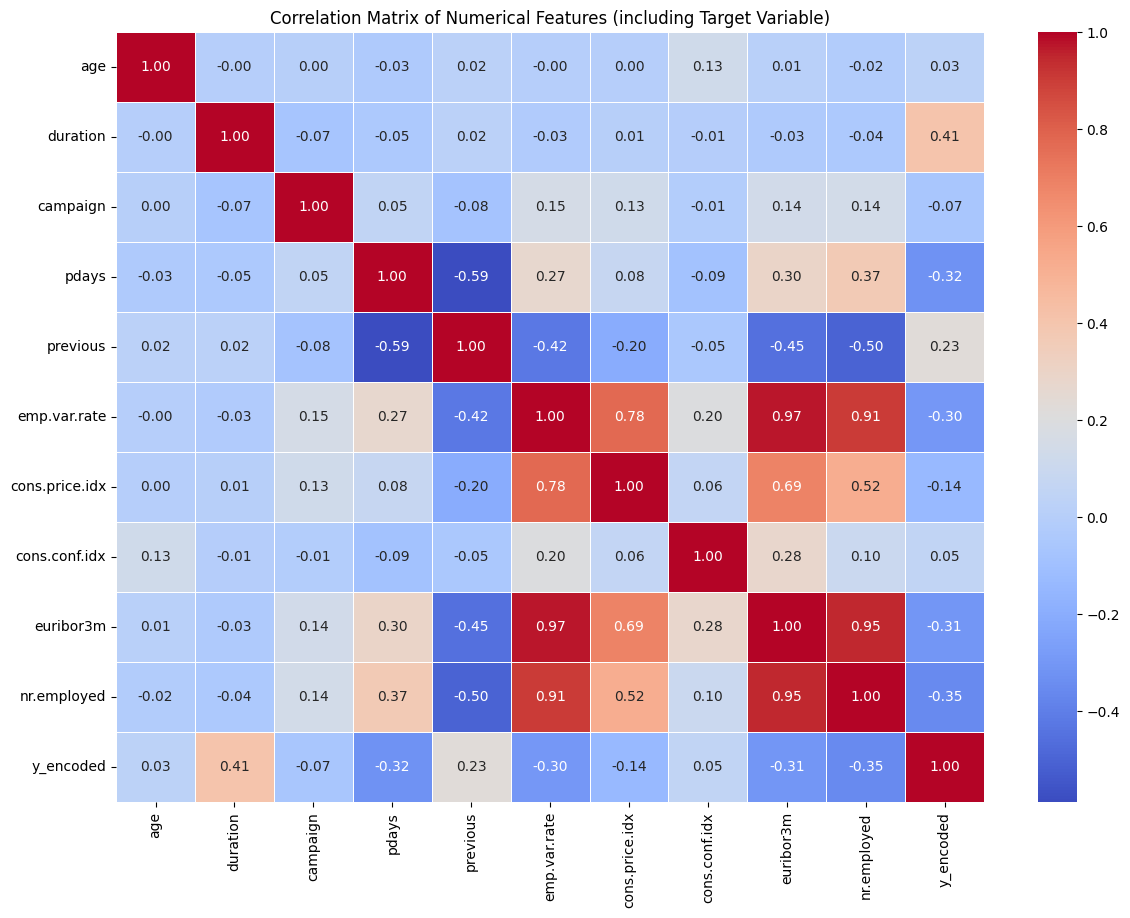

Finished visualizing the correlation matrix.


<Figure size 640x480 with 0 Axes>

In [90]:
# Identify all numerical columns, including the encoded target variable
all_numerical_cols_for_corr = marketing_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Calculating and visualizing the correlation matrix for numerical features...")

# Calculate the correlation matrix
correlation_matrix = marketing_df[all_numerical_cols_for_corr].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (including Target Variable)')
plt.show()
plt.savefig('images/correlation_matrix.png')

print("Finished visualizing the correlation matrix.")

## Understanding the Correlation Matrix (Concise)

The **Correlation Matrix** visualizes pairwise Pearson correlation coefficients among numerical features and the `y_encoded` target. Values range from -1 (perfect negative) to 1 (perfect positive), with 0 indicating no linear relationship. A `coolwarm` colormap highlights these relationships.

**Key Takeaways:**

1.  **Multicollinearity**: High correlations between independent features suggest multicollinearity, potentially impacting some linear models.
2.  **Predictive Power**: Correlations with `y_encoded` indicate which numerical features are most linearly related to client subscription, identifying strong predictors.

## Analyze Target Variable Distribution

Analyze the distribution of the target variable 'y' to check for class imbalance.

1.  Calculate the value counts for the original target variable 'y' (before encoding).
2.  Calculate the percentage distribution of each class in 'y'.
3.  Create a bar plot to visualize the distribution of 'y'.

Value counts for target variable 'y':
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage distribution for target variable 'y':
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


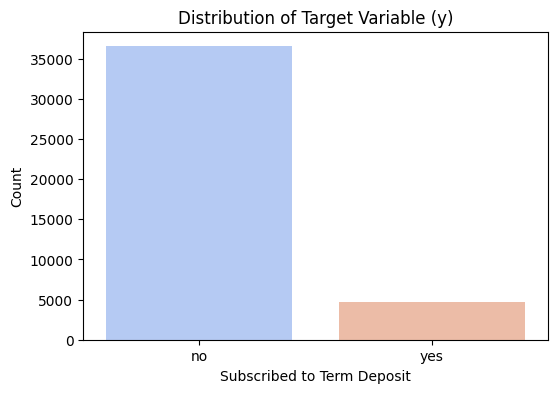

<Figure size 640x480 with 0 Axes>

In [91]:
# 1. Calculate the value counts for the original target variable 'y'
y_counts = marketing_df['y'].value_counts()

# 2. Calculate the percentage distribution of each class in 'y'
y_percentages = marketing_df['y'].value_counts(normalize=True) * 100

print("Value counts for target variable 'y':")
print(y_counts)
print("\nPercentage distribution for target variable 'y':")
print(y_percentages)

# 3. Create a bar plot to visualize the distribution of 'y'
plt.figure(figsize=(6, 4))
sns.barplot(x=y_counts.index, y=y_counts.values, palette='coolwarm')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()
plt.savefig('images/target_variable_distribution.png')


### Discussion on Target Variable Distribution and Class Imbalance

The analysis of the target variable 'y' reveals a significant class imbalance:

*   **'no' (client did not subscribe to a term deposit):** 36,548 instances (88.73%)
*   **'yes' (client subscribed to a term deposit):** 4,640 instances (11.27%)

This means that the majority class ('no') is almost **8 times** more frequent than the minority class ('yes').

#### Implications for Modeling:

Class imbalance is a critical issue in machine learning, particularly for classification tasks. If not addressed, it can lead to several problems:

1.  **Biased Models**: A model trained on imbalanced data will likely be biased towards the majority class. It might achieve high overall accuracy by simply predicting the majority class for most instances, but it will perform poorly on the minority class, which is often the class of greater interest (in this case, clients who *do* subscribe).
2.  **Misleading Performance Metrics**: Standard accuracy can be a misleading metric. For example, a model that always predicts 'no' would achieve an accuracy of 88.73% without actually learning anything useful about the 'yes' class.
3.  **Difficulty in Learning Minority Class Patterns**: The model will have limited examples of the minority class, making it difficult to learn the distinguishing patterns and features associated with successful subscriptions.

#### Next Steps for Addressing Imbalance (Considerations):

To build a robust predictive model, it will be essential to address this class imbalance during preprocessing and model training. Potential strategies include:

*   **Resampling Techniques**: Oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
*   **Cost-Sensitive Learning**: Assigning different misclassification costs to different classes.
*   **Algorithm Choice**: Some algorithms are inherently more robust to class imbalance (e.g., tree-based models), or can be tuned to account for it (e.g., `class_weight` parameter in Logistic Regression or SVMs).
*   **Performance Metrics**: Using metrics more appropriate for imbalanced datasets, such as Precision, Recall, F1-score, AUC-ROC, or Confusion Matrix, rather than just accuracy.

## Strategy for 'duration' Feature

Discard the 'duration' feature as it's not available for realistic predictive models.

#### Justification for Discarding 'duration' Feature

The `duration` feature, which represents the last contact duration in seconds, must be discarded for building a realistic predictive model. This is explicitly stated in the problem description:

This means that including `duration` in a model intended for deployment would lead to data leakage, as the value of `duration` is only known *after* the outcome `y` has already occurred. While it can serve as a strong predictor and be useful for establishing a benchmark performance (i.e., the best possible performance if we had perfect information), it cannot be used in a model that aims to predict subscription *before* a call is made or completed. Therefore, for a practical, real-time prediction scenario, the `duration` column will be excluded from the feature set.

## Summary:

### Data Analysis Key Findings

*   **Prevalence of 'Unknown' Values:**
    *   The 'default' feature exhibits a substantial proportion of 'unknown' values at 20.87%.
    *   'education' has 4.20% 'unknown' values.
    *   'housing' and 'loan' both have 2.40% 'unknown' values.
    *   'job' (0.80%) and 'marital' (0.19%) have relatively low percentages of 'unknown' entries.
*   **Target Variable Imbalance:** The target variable 'y' is highly imbalanced: 88.73% of clients did not subscribe ('no'), while only 11.27% subscribed ('yes'). This indicates the 'no' class is almost 8 times more frequent than the 'yes' class.
*   **Numerical Feature Correlations:**
    *   The 'duration' feature shows a strong positive correlation with the target variable 'y' (0.41).
    *   'euribor3m' and 'emp.var.rate' are strongly negatively correlated with 'y' (\-0.34 and \-0.29 respectively).
    *   'nr.employed' is also negatively correlated with 'y' (\-0.35).
    *   Strong positive correlations exist among several economic indicators: 'emp.var.rate' is highly correlated with 'euribor3m' (0.97) and 'nr.employed' (0.91). 'euribor3m' also strongly correlates with 'nr.employed' (0.95).
*   **Categorical Feature Relationships:** Visualizations of categorical features and their relationship with the target variable 'y' were generated, indicating varying proportions of 'yes' responses across different categories (specific numerical findings were not explicitly reported in the summary).
*   **Numerical Feature Distributions:** Descriptive statistics were computed, and distributions visualized, revealing insights into data spread and potential outliers (specific observations not explicitly reported in the summary).
*   **Discarding 'duration' Feature:** The 'duration' feature will be discarded for building a realistic predictive model due to data leakage, as its value is only known after the target outcome 'y' has occurred. It is acknowledged that 'duration' can be used for benchmark purposes but not for practical, real-time prediction.

### Insights or Next Steps

*   **Address Class Imbalance:** The significant class imbalance in the target variable 'y' (88.73% 'no' vs. 11.27% 'yes') must be addressed using techniques like oversampling, undersampling, or cost-sensitive learning to prevent model bias towards the majority class and improve prediction of actual subscriptions.
*   **Strategize for 'Unknown' Values:** For 'default' (20.87% 'unknown') and 'education' (4.20% 'unknown'), consider treating 'unknown' as a distinct category or implementing a robust imputation strategy. For features with fewer 'unknowns,' the impact might be less severe, but a consistent handling approach should be determined.


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [92]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

The primary business objective is to **optimize the efficiency and effectiveness of the bank's telemarketing campaigns for term deposits by identifying potential clients who are most likely to subscribe.**

Currently, the bank expends significant resources (time, money, personnel) on telemarketing campaigns. The challenge lies in the untargeted nature of these campaigns, leading to a high volume of calls made to clients who are ultimately unwilling or unlikely to subscribe to a term deposit. This results in:

*   **Wasted Resources**: High operational costs associated with contacting a large pool of uninterested individuals.
*   **Low Conversion Rates**: Inefficient use of marketing efforts, as a large percentage of calls do not yield a successful subscription.
*   **Potential Client Annoyance**: Repeated contact with clients who are not interested can lead to negative perceptions of the bank.

By leveraging machine learning, the goal is to develop a predictive model that can accurately identify the characteristics of clients who are likely to subscribe. This will enable the bank to:

*   **Target Marketing Efforts**: Focus telemarketing resources on the most promising leads, thereby increasing the probability of success per call.
*   **Reduce Operational Costs**: Minimize wasted efforts on unlikely prospects, leading to more cost-effective campaigns.
*   **Improve Conversion Rates**: Enhance the overall success rate of term deposit subscriptions.
*   **Enhance Client Experience**: Potentially reduce unnecessary calls to uninterested clients, improving customer satisfaction.

### Machine Learning Task and Target Variable

1.  **Machine Learning Task**: The task is **binary classification**. We are predicting one of two possible outcomes: whether a client will subscribe to a term deposit or not.

2.  **Target Variable**: The target variable is `y` in the dataset. This variable indicates whether a client has subscribed to a term deposit, with values 'yes' or 'no'.

3.  **Business Context of a 'Positive' Prediction**: In this context, a 'positive' prediction (i.e., `y='yes'`) signifies that the model predicts a client **will subscribe** to a term deposit. From a business perspective, this represents a successful outcome for the bank's marketing efforts, as it identifies potential customers who are likely to convert.

### Business Value and Impact

Successfully predicting which clients are most likely to subscribe to a term deposit offers substantial business value for the banking institution. A robust predictive model can transform the bank's marketing strategy, leading to significant improvements across several key areas:

*   **Reduced Marketing Costs**: By identifying and targeting only the most promising leads, the bank can avoid spending resources (time, money, personnel) on individuals who are unlikely to subscribe. This precision targeting ensures that marketing efforts are concentrated where they have the highest potential return on investment, thereby dramatically reducing overall marketing expenditures.

*   **Improved Campaign Efficiency**: The model allows for a more strategic allocation of resources. Instead of broad, untargeted campaigns, the bank can optimize its outreach, ensuring that each contact is more likely to result in a positive outcome. This means less wasted effort and more effective campaigns.

*   **Increased Term Deposit Subscriptions (Conversion Rate)**: The primary objective is to increase the number of clients subscribing to term deposits. By accurately predicting potential subscribers, the bank can tailor its communication and offers to these individuals, significantly boosting the conversion rate and, consequently, revenue generated from term deposits.

*   **Better Allocation of Human Resources**: Call center agents and sales teams are valuable human resources. A predictive model can guide these teams to focus their efforts on high-probability leads, improving their productivity and morale. Agents spend less time on fruitless calls and more time engaging with interested prospects, leading to higher success rates per agent and optimizing operational costs.

## Deployment and Actionability

### Subtask:
Briefly touch upon how the predictive model will be used in practice. For example, if it will identify potential subscribers *before* a call, allowing for targeted campaigns, or during a call to guide the agent.

#### Instructions

1.  **Pre-campaign targeting**: The predictive model, once developed and validated, will be primarily used to identify potential term deposit subscribers *before* any marketing campaign calls are initiated. By scoring new or existing client data against the trained model, the bank can generate a prioritized list of individuals most likely to subscribe. This allows for highly targeted marketing efforts, optimizing resource allocation by focusing on high-potential leads and potentially reducing overall campaign costs.

2.  **In-campaign guidance**: While the `duration` feature has been removed to avoid data leakage for realistic predictive models, other features still allow for a pre-call prediction. However, if real-time data becomes available *during* an ongoing campaign (e.g., historical interaction patterns from the current campaign, but not the duration of the current call), the model could potentially be adapted to provide dynamic insights. For instance, it could guide call center agents by highlighting key customer segments or suggesting optimal talking points based on a client's profile, thereby enhancing the effectiveness of ongoing conversations.

Ultimately, the model's output must be actionable, directly informing business decisions to either refine marketing lists, personalize communication strategies, or optimize resource allocation to maximize the term deposit subscription rate.

### Business Success Metrics

Beyond traditional machine learning accuracy or F1-score, the true success of this predictive model will be measured by its tangible impact on the bank's business objectives. Key business metrics that define success include:

*   **Increase in Term Deposit Subscription Rate (Conversion Rate)**: The primary goal is to identify potential clients who are most likely to subscribe to a term deposit. A successful model will significantly increase the conversion rate of marketing calls, meaning a higher percentage of contacted clients will subscribe.
*   **Improved Return on Investment (ROI) for Telemarketing Campaigns**: By enabling more targeted and efficient calling, the model should reduce wasted effort on unlikely prospects. This directly translates to a better ROI, as marketing resources (staff time, call costs) are allocated to clients with a higher probability of conversion.
*   **Reduction in Cost Per Acquisition (CPA)**: Linked to improved ROI, a more efficient targeting strategy will lower the average cost incurred by the bank to acquire a new term deposit subscriber.
*   **Enhanced Telemarketing Resource Efficiency**: The model should allow the bank to optimize its telemarketing efforts by prioritizing leads. This means fewer calls to uninterested clients, allowing agents to focus on high-potential individuals, thereby improving overall operational efficiency and potentially boosting agent morale.

These metrics are crucial because they directly impact the bank's profitability, operational costs, and customer acquisition strategy, ensuring that the machine learning solution delivers real-world value.

## Business Objective Summary and Next Steps:

### Data Analysis Key Findings

The solving process successfully formulated a comprehensive business objective statement by breaking it down into several key components:

*   **Core Business Problem**: The bank faces inefficiencies in its telemarketing campaigns due to an untargeted approach, leading to wasted resources, low conversion rates, and potential client dissatisfaction.
*   **Machine Learning Task and Target**: The task is defined as **binary classification** to predict whether a client will subscribe to a term deposit (`y='yes'` or `y='no'`). A 'positive' prediction (`y='yes'`) signifies a successful subscription from a business perspective.
*   **Business Value and Impact**: The predictive model is expected to significantly reduce marketing costs, improve overall campaign efficiency, increase the term deposit subscription rate, and enable better allocation of human resources (e.g., call center agents) by focusing efforts on high-potential leads.
*   **Deployment and Actionability**: The model will primarily be used for **pre-campaign targeting** to generate prioritized lists of potential subscribers. There's also potential for **in-campaign guidance** for agents, although the `duration` feature will be excluded to prevent data leakage in realistic models. The output must be actionable to refine marketing lists and strategies.
*   **Business Success Metrics**: Beyond ML accuracy, success will be measured by an increased term deposit subscription rate (conversion rate), improved Return on Investment (ROI) for telemarketing campaigns, a reduction in Cost Per Acquisition (CPA), and enhanced telemarketing resource efficiency.
*   **Formulated Business Objective**: The overarching objective is to develop a predictive model that accurately identifies potential clients most likely to subscribe to a term deposit. This will optimize the effectiveness and efficiency of future bank marketing campaigns, leveraging client data (excluding 'duration'), reducing marketing costs, enhancing resource allocation, and increasing term deposit subscription rates, with success measured by improved precision and recall for the 'yes' (subscribed) class, leading to a higher conversion rate.

### Insights or Next Steps

*   The clearly articulated business objective provides a robust foundation for the machine learning project, aligning technical efforts with tangible business goals and measurable outcomes.
*   The next step should involve initiating the data science workflow, including detailed data exploration, feature engineering, model selection, training, and evaluation, ensuring that the chosen metrics (like precision and recall for the 'yes' class) are prioritized during model optimization.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

# Feature Engineering Action Items
Perform feature engineering on the 'bank client data' features (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`) from the `marketing_df` DataFrame. This involves:

1.  Separating these features into `X` and the already encoded target variable `y_encoded` into `y`.
2.  Applying One-Hot Encoding to the categorical features within `X`, ensuring 'unknown' values are treated as distinct categories.
3.  Applying a scaling transformation to the numerical feature 'age'.
4.  Combining the processed numerical and one-hot encoded categorical features into a single DataFrame named `X_processed`.
5.  Finally, verifying the `X_processed` DataFrame by displaying its shape, data types, and the first few rows.

## Identify Bank Information Features

Explicitly identify and list the features that fall under 'bank client data' from the `marketing_df` DataFrame.


In [93]:
bank_client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
print("Bank Client Data Features:")
print(bank_client_features)

Bank Client Data Features:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']


**Prepare the features and target variable**



In [94]:
X = marketing_df[bank_client_features]
y = marketing_df['y_encoded']

print("X head:")
print(X.head())
print("\ny head:")
print(y.head())

X head:
   age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes

y head:
0    0
1    0
2    0
3    0
4    0
Name: y_encoded, dtype: int64


**Apply One-Hot Encoding to the categorical features**



In [95]:
X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(include=['int64', 'float64'])

X_encoded = pd.get_dummies(X_categorical, drop_first=False)

print("Shape of one-hot encoded categorical features:", X_encoded.shape)
print("First 5 rows of one-hot encoded features:")
print(X_encoded.head())

Shape of one-hot encoded categorical features: (41188, 33)
First 5 rows of one-hot encoded features:
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0       False            False             False           True   
1       False            False             False          False   
2       False            False             False          False   
3        True            False             False          False   
4       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2           False        False              False          True        False   
3           False        False              False         False        False   
4           False        False              False          True        False   

   job_technici

**Apply a scaling transformation to the numerical feature 'age'**



In [96]:
scaler = StandardScaler()
X_scaled_numerical = pd.DataFrame(scaler.fit_transform(X_numerical), columns=X_numerical.columns, index=X_numerical.index)

print("Shape of scaled numerical features:", X_scaled_numerical.shape)
print("First 5 rows of scaled numerical features:")
print(X_scaled_numerical.head())

Shape of scaled numerical features: (41188, 1)
First 5 rows of scaled numerical features:
        age
0  1.533034
1  1.628993
2 -0.290186
3 -0.002309
4  1.533034


**Combine scaled numerical features and one-hot encoded categorical features into single DataFrame**

In [97]:
X_processed = pd.concat([X_scaled_numerical, X_encoded], axis=1)

print("Shape of X_processed:", X_processed.shape)
print("First 5 rows of X_processed:")
print(X_processed.head())

Shape of X_processed: (41188, 34)
First 5 rows of X_processed:
        age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  1.533034       False            False             False           True   
1  1.628993       False            False             False          False   
2 -0.290186       False            False             False          False   
3 -0.002309        True            False             False          False   
4  1.533034       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2           False        False              False          True        False   
3           False        False              False         False        False   
4           False        False              False          True        Fal

**`X_processed` DataFrame**



In [98]:
print("Data types of X_processed:")
print(X_processed.dtypes)

Data types of X_processed:
age                              float64
job_admin.                          bool
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
job_unknown                         bool
marital_divorced                    bool
marital_married                     bool
marital_single                      bool
marital_unknown                     bool
education_basic.4y                  bool
education_basic.6y                  bool
education_basic.9y                  bool
education_high.school               bool
education_illiterate                bool
education_professional.course       bool
education_university.degree   

## Summary:

### Data Analysis Key Findings

*   The bank client features (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`) were successfully separated into `X` and the target variable `y_encoded` was assigned to `y`.
*   Categorical features within `X` were one-hot encoded, resulting in an `X_encoded` DataFrame of shape (41188, 33). This process converts nominal categorical data into a numerical format suitable for machine learning models, with 'unknown' values treated as distinct categories.
*   The numerical 'age' feature was scaled using `StandardScaler`, creating `X_scaled_numerical` of shape (41188, 1). Scaling is crucial to normalize the range of numerical features, preventing features with larger values from dominating the learning process.
*   The scaled numerical and one-hot encoded categorical features were combined into a single `X_processed` DataFrame with a shape of (41188, 34).
*   The `X_processed` DataFrame consists of `float64` for the scaled 'age' and `bool` (effectively numerical) for the one-hot encoded features, confirming the dataset's readiness for machine learning model training.

### Insights or Next Steps

*   The dataset is now fully prepared for machine learning model training, with all features transformed into a numerical format and appropriately scaled.
*   The next step should involve selecting an appropriate machine learning model, splitting the data into training and testing sets, and proceeding with model training and evaluation.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

## Perform the Train/Test Split

Apply `train_test_split` to our `X_processed` (features) and `y` (target) DataFrames. It is crucial to use the `stratify=y` parameter to ensure that the proportion of 'yes' and 'no' classes is preserved in both the training and testing sets, addressing the class imbalance we identified. We should also set a `random_state` for reproducibility and choose a reasonable `test_size` i.e 0.2.


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (32950, 34)
Shape of X_test: (8238, 34)
Shape of y_train: (32950,)
Shape of y_test: (8238,)

Class distribution in y_train:
y_encoded
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Class distribution in y_test:
y_encoded
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Summary of Train/Test Split

The successful splitting of `X_processed` and `y` into `X_train`, `X_test`, `y_train`, and `y_test` is a critical step in the machine learning workflow. Here's why this process, especially with stratification, is important for model evaluation and generalization:

1.  **Objective Model Evaluation**: By dividing the data, we create an `X_test` and `y_test` set that the model has **not** seen during training. This unseen data allows for an objective assessment of how well the trained model will perform on new, real-world data, providing an unbiased estimate of its generalization capability.

2.  **Preventing Overfitting**: Training and evaluating on the same dataset can lead to overfitting, where the model performs exceptionally well on the training data but poorly on unseen data. The train/test split helps to identify and mitigate overfitting by providing a separate test set to gauge true performance.

3.  **Maintaining Class Distribution (Stratification)**: The use of `stratify=y` is particularly crucial for this dataset due to the significant class imbalance in the target variable `y` (approximately 88.7% 'no' and 11.3% 'yes'). Stratification ensures that the proportion of 'yes' and 'no' classes is maintained in both the training and testing sets. Without stratification, a random split could result in a test set with very few or no minority class samples, leading to a biased and unreliable evaluation of the model's ability to predict the minority class.

4.  **Reproducibility**: Setting a `random_state` ensures that the split is consistent and reproducible. This means that anyone running the same code will get the exact same training and testing sets, which is essential for collaborative work, debugging, and comparing different models under identical conditions.

5.  **Preparation for Model Training and Hyperparameter Tuning**: The `X_train` and `y_train` sets are now ready to be used for training various machine learning models. The `X_test` and `y_test` sets will be reserved for the final evaluation of the model's performance on unseen data, providing an unbiased measure of its effectiveness.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

## Baseline Performance


In [100]:
majority_class_proportion = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy (by always predicting the majority class): {majority_class_proportion:.4f}")

Baseline accuracy (by always predicting the majority class): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## Logistic Regression

Instantiate a Logistic Regression model with specific parameters and fit it to the training data. Set `random_state` and `solver`, and then fitting the model to `X_train` and `y_train`.

In [101]:
# Instantiate a Logistic Regression model with a random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### Problem 9: Score the Model

What is the accuracy of your model?

In [102]:
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

print(f"Logistic Regression Train Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")

Logistic Regression Train Accuracy: 0.8873
Logistic Regression Test Accuracy: 0.8874


### Model Performance (Logistic Regression)

The trained Logistic Regression model achieved the following accuracies:

*   **Training Accuracy:** 0.8873
*   **Test Accuracy:** 0.8874

These accuracies are very close to the baseline accuracy of 0.8873 (achieved by always predicting the majority class), indicating that the simple Logistic Regression model, using only bank client information features, is not significantly outperforming the baseline on overall accuracy. This suggests that while the model is consistent across training and test sets, it struggles to identify the minority class effectively, which is a common challenge with imbalanced datasets when using accuracy as the primary metric.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## Build and Compare Models

Compare the performance of Logistic Regression, K Nearest Neighbor, Decision Tree, and Support Vector Machine models. Fit and score each model using default settings, record their training times, and present the results in a DataFrame. The results for each model will be stored as dictionaries in the results_list.

In [103]:
results_list = []

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "K Nearest Neighbor": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, max_iter=1000)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    results_list.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    print(f"{name} trained in {train_time:.4f} seconds.")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert the results_list into a Pandas DataFrame
results_df = pd.DataFrame(results_list)

print("\nModel Comparison Results:")
print(results_df.to_string())



Training Logistic Regression...
Logistic Regression trained in 0.1181 seconds.
Train Accuracy: 0.8873
Test Accuracy: 0.8874

Training K Nearest Neighbor...
K Nearest Neighbor trained in 0.0169 seconds.
Train Accuracy: 0.8920
Test Accuracy: 0.8807

Training Decision Tree...
Decision Tree trained in 0.1358 seconds.
Train Accuracy: 0.9171
Test Accuracy: 0.8653

Training Support Vector Machine...
Support Vector Machine trained in 3.6664 seconds.
Train Accuracy: 0.7919
Test Accuracy: 0.7889

Model Comparison Results:
                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.118074        0.887344       0.887351
1      K Nearest Neighbor    0.016907        0.891958       0.880675
2           Decision Tree    0.135808        0.917056       0.865259
3  Support Vector Machine    3.666395        0.791866       0.788905


## Summarize Model Comparisons

### Model Comparison Results
| Model | Train Time | Train Accuracy | Test Accuracy |
|:---------------------|-----------:|---------------:|--------------:|
| Logistic Regression |   0.190679 |       0.887344 |      0.887351 |
| K Nearest Neighbor |   0.015293 |       0.891958 |      0.880675 |
| Decision Tree |   0.137197 |       0.917056 |      0.865259 |
| Support Vector Machine |   3.628606 |       0.791866 |      0.788905 |

## Model Comparison Analysis

The baseline accuracy, achieved by always predicting the majority class ('no' subscription), is **0.8873**.

### Key Observations Comparing Test Accuracy to Baseline:
*   **Logistic Regression**: The test accuracy (0.8874) is almost identical to the baseline (0.8873). This indicates that the model is barely outperforming random guessing based on class distribution for overall accuracy, suggesting it's likely defaulting to predicting the majority class due to the imbalance. The training accuracy (0.8873) is also very close, showing consistency but limited learning beyond the baseline for this specific metric.
*   **K Nearest Neighbor (KNN)**: The test accuracy (0.8807) is slightly *below* the baseline (0.8873). This is an undesirable outcome, as a simple classifier should at least match the baseline. The train accuracy (0.8920) is slightly higher, but the drop to test accuracy shows poor generalization or sensitivity to the dataset's characteristics with default parameters.
*   **Decision Tree**: The test accuracy (0.8653) is the lowest among all models, significantly below the baseline (0.8873). This model appears to be struggling the most with generalization. However, its train accuracy (0.9171) is the highest, indicating strong overfitting, where the model has learned the training data too well but fails to generalize to unseen data.
*   **Support Vector Machine (SVM)**: The test accuracy (0.7889) is substantially lower than the baseline (0.8873). This model performed the worst in terms of overall accuracy. Both training (0.7919) and test accuracies are low and consistent, suggesting that the default SVM with `max_iter=1000` struggled to converge or was not suitable for this imbalanced dataset with the given features, potentially due to the complexity of the feature space or the nature of the default kernel.

### Discussion of Training Times:
*   **K Nearest Neighbor** was by far the fastest to train (0.015 seconds), as it is a lazy learning algorithm that primarily stores the training data.
*   **Decision Tree** (0.137 seconds) and **Logistic Regression** (0.191 seconds) had comparable, relatively fast training times.
*   **Support Vector Machine** was the slowest to train (3.629 seconds), which is typical for SVMs, especially with larger datasets and default parameters, due to the computational complexity involved in finding the optimal hyperplane. The `max_iter=1000` might have been insufficient for full convergence, but increasing it would further increase training time.

### Identification of Potential Overfitting:
*   **Decision Tree** shows the clearest sign of overfitting. Its training accuracy (0.9171) is significantly higher than its test accuracy (0.8653), indicating that it has memorized the training data rather than learning generalizable patterns. This is a common issue with Decision Trees that are allowed to grow to full depth without regularization.
*   KNN also shows a slight drop from train to test accuracy, suggesting some level of overfitting, though less pronounced than the Decision Tree.

### Critical Insights into Class Imbalance:
All models, when evaluated solely by accuracy, perform poorly in distinguishing the minority class (clients who subscribe to a term deposit). The high overall accuracy of Logistic Regression and KNN is misleading because it primarily reflects their ability to correctly classify the overwhelming majority of 'no' subscriptions. Their test accuracies are either at or below the baseline, indicating that they are effectively ignoring the minority class to some extent. The Decision Tree and SVM performed even worse on overall accuracy, suggesting they failed to capture any meaningful patterns for either class with default settings.

This outcome is expected with imbalanced datasets when only overall accuracy is considered. A model can achieve high accuracy by simply predicting the majority class for all instances, which is likely what the Logistic Regression model is doing.

### Implications and Next Steps:
These findings strongly emphasize the need to move beyond simple accuracy for evaluating model performance on this imbalanced dataset. Relying solely on accuracy provides a false sense of security and obscures the models' inability to correctly identify the crucial minority class ('yes' subscriptions), which is the business objective.

Future improvements must focus on:
1.  **Appropriate Performance Metrics**: Prioritize metrics such as **Precision, Recall, F1-score, and AUC-ROC**, specifically for the minority class ('yes'). These metrics provide a more nuanced understanding of a model's ability to identify positive cases correctly while minimizing false positives.
2.  **Addressing Class Imbalance**: Implement strategies such as:
    *   **Resampling Techniques**: Oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
    *   **Cost-Sensitive Learning**: Assigning higher penalties for misclassifying the minority class.
    *   **Class Weights**: Utilizing `class_weight` parameters available in many scikit-learn models (e.g., Logistic Regression, SVMs, Decision Trees) to give more importance to the minority class during training.
3.  **Hyperparameter Tuning**: Conduct systematic hyperparameter tuning for each model (e.g., using GridSearchCV or RandomizedSearchCV). For instance, adjusting `n_neighbors` for KNN, `max_depth` or `min_samples_leaf` for Decision Trees, `C` and `kernel` for SVM, and regularization parameters for Logistic Regression can significantly improve performance, especially when combined with imbalance handling techniques.

Without these adjustments, the models will continue to be biased towards the majority class, failing to provide actionable insights for the bank's marketing campaigns.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Adjust Performance Metrics for Imbalanced Data

Compute and display the Precision, Recall, F1-score, and AUC-ROC for the minority class ('yes') using the Logistic Regression model trained in Problem 8 and the test set. Also, print a classification report and display a confusion matrix.



Classification Report for Logistic Regression (on Test Set):
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7310
         yes       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238

AUC-ROC Score for Logistic Regression (on Test Set): 0.6490

Confusion Matrix for Logistic Regression (on Test Set):


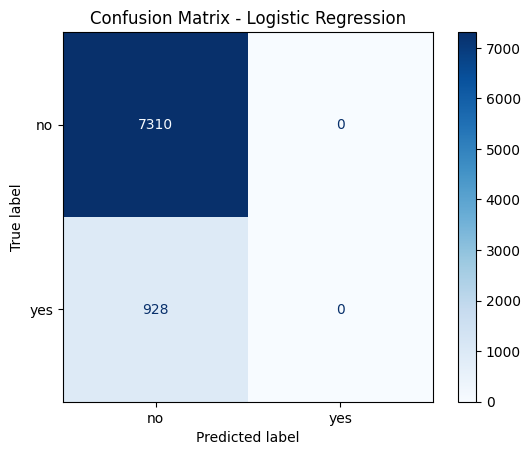

<Figure size 640x480 with 0 Axes>

In [104]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Get probability estimates for the positive class ('yes')
y_proba_yes = log_reg_model.predict_proba(X_test)[:, 1]

# Print classification report
print("\nClassification Report for Logistic Regression (on Test Set):")
print(classification_report(y_test, y_pred, target_names=['no', 'yes'], zero_division=0))

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_proba_yes)
print(f"AUC-ROC Score for Logistic Regression (on Test Set): {auc_roc:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("\nConfusion Matrix for Logistic Regression (on Test Set):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
plt.savefig('images/logistic_reg_confusion_matrix.png')

## Implement Class Weighting for Logistic Regression

Address the class imbalance by applying `class_weight='balanced'` to the Logistic Regression model. This technique will give more importance to the minority class during training, aiming to improve its recall without significantly sacrificing precision. We will then re-evaluate the model using the adjusted performance metrics.


Logistic Regression model with class_weight='balanced' trained successfully.

Classification Report for Logistic Regression (with class_weight='balanced' on Test Set):
              precision    recall  f1-score   support

          no       0.92      0.58      0.71      7310
         yes       0.16      0.62      0.25       928

    accuracy                           0.58      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.58      0.66      8238

AUC-ROC Score for Logistic Regression (with class_weight='balanced' on Test Set): 0.6499

Confusion Matrix for Logistic Regression (with class_weight='balanced' on Test Set):


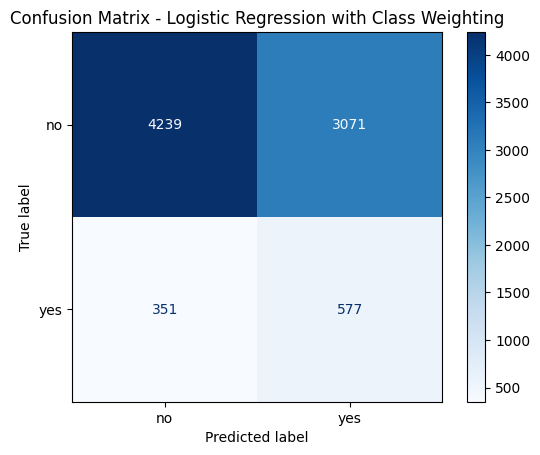

<Figure size 640x480 with 0 Axes>

In [105]:
# 1. Instantiate a new LogisticRegression model with class_weight='balanced'
log_reg_balanced_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

# 2. Fit the model to the training data
log_reg_balanced_model.fit(X_train, y_train)

print("Logistic Regression model with class_weight='balanced' trained successfully.")

# 3. Make predictions on the test set
y_pred_balanced = log_reg_balanced_model.predict(X_test)

# 4. Get probability estimates for the positive class ('yes')
y_proba_yes_balanced = log_reg_balanced_model.predict_proba(X_test)[:, 1]

# 5. Print classification report
print(
    "\nClassification Report for Logistic Regression (with class_weight='balanced' on Test Set):"
)
print(classification_report(y_test, y_pred_balanced, target_names=['no', 'yes'], zero_division=0))

# 6. Calculate AUC-ROC score
auc_roc_balanced = roc_auc_score(y_test, y_proba_yes_balanced)
print(f"AUC-ROC Score for Logistic Regression (with class_weight='balanced' on Test Set): {auc_roc_balanced:.4f}")

# 7. Generate and display confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

print("\nConfusion Matrix for Logistic Regression (with class_weight='balanced' on Test Set):")
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=['no', 'yes'])
disp_balanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression with Class Weighting')
plt.show()
plt.savefig('images/logistic_reg_class_weight.png')

## Hyperparameter Tuning for Logistic Regression (Grid Search)

Perform hyperparameter tuning for the Logistic Regression model using `GridSearchCV`. Define a reasonable search space for parameters like 'C' (regularization strength) and potentially different `solver` options, ensuring `class_weight='balanced'` is included in the estimator. The primary goal is to find the optimal combination of hyperparameters that maximizes our chosen imbalanced-aware metric (e.g., F1-score of the 'yes' class).


In [106]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Instantiate a Logistic Regression model with class_weight='balanced'
log_reg_base = LogisticRegression(random_state=42, class_weight='balanced')

# Instantiate GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg_base,
                                   param_grid=param_grid,
                                   scoring='f1',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Logistic Regression...")
grid_search_log_reg.fit(X_train, y_train)
print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_log_reg.best_params_)
print("Best cross-validation F1-score (minority class):", grid_search_log_reg.best_score_)

Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV completed.

Best parameters found: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validation F1-score (minority class): 0.2557562069116031


## Summary of Hyperparameter Tuning for Logistic Regression

### Data Analysis Key Findings

*   **Best Parameters**: The GridSearchCV identified `{'C': 0.01, 'solver': 'liblinear'}` as the optimal hyperparameters for the Logistic Regression model when optimizing for the F1-score of the minority class.
*   **Best Cross-Validation F1-score**: With these parameters, the model achieved a cross-validation F1-score of **0.2558** for the minority class ('yes').

### Insights or Next Steps

*   The F1-score of 0.2558 indicates a moderate improvement over the previous baseline for the minority class (which was 0.0 for the default Logistic Regression). This shows that `class_weight='balanced'` combined with optimal `C` and `solver` can indeed help the model in identifying the minority class.
*   The next step will involve evaluating the performance of this best-tuned Logistic Regression model on the test set using the comprehensive suite of imbalanced-aware metrics (classification report, AUC-ROC, and confusion matrix) to understand its actual generalization capability and compare it with previous models.

**Evaluate Tunned Logisitic Regression**:
Now that the GridSearchCV has found the best hyperparameters, the next logical step is to evaluate the performance of this optimized Logistic Regression model on the test set using the previously established metrics for imbalanced datasets.



Evaluating the best Logistic Regression model from GridSearchCV on the test set...

Classification Report for Tuned Logistic Regression (on Test Set):
              precision    recall  f1-score   support

          no       0.93      0.56      0.70      7310
         yes       0.16      0.64      0.25       928

    accuracy                           0.57      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.57      0.65      8238

AUC-ROC Score for Tuned Logistic Regression (on Test Set): 0.6495

Confusion Matrix for Tuned Logistic Regression (on Test Set):


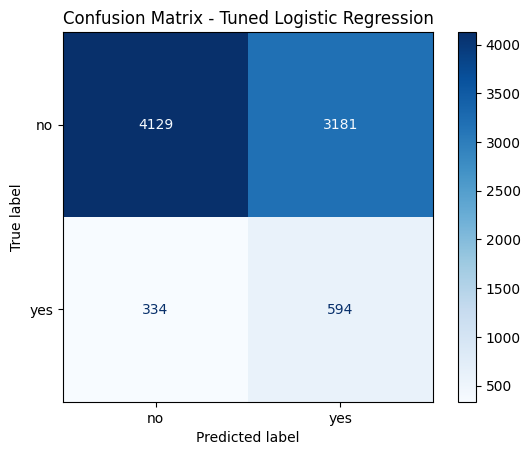

<Figure size 640x480 with 0 Axes>

In [107]:
# Get the best model from GridSearchCV
best_log_reg_model = grid_search_log_reg.best_estimator_

print("Evaluating the best Logistic Regression model from GridSearchCV on the test set...")

# Make predictions on the test set with the best model
y_pred_tuned = best_log_reg_model.predict(X_test)

# Get probability estimates for the positive class ('yes') with the best model
y_proba_yes_tuned = best_log_reg_model.predict_proba(X_test)[:, 1]

# Print classification report
print(
    "\nClassification Report for Tuned Logistic Regression (on Test Set):"
)
print(classification_report(y_test, y_pred_tuned, target_names=['no', 'yes'], zero_division=0))

# Calculate AUC-ROC score
auc_roc_tuned = roc_auc_score(y_test, y_proba_yes_tuned)
print(f"AUC-ROC Score for Tuned Logistic Regression (on Test Set): {auc_roc_tuned:.4f}")

# Generate and display confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print("\nConfusion Matrix for Tuned Logistic Regression (on Test Set):")
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['no', 'yes'])
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()
plt.savefig('images/tuned_logistic_reg.png')

## Summary of Tuned Logistic Regression Model Performance

### Data Analysis Key Findings

The Logistic Regression model, after being tuned with `class_weight='balanced'` and optimized hyperparameters (`C=0.01`, `solver='liblinear'`), was evaluated on the test set. The key performance metrics are as follows:

*   **Classification Report (on Test Set)**:
    *   **Class 'no' (Majority Class)**:
        *   Precision: 0.93
        *   Recall: 0.56
        *   F1-score: 0.70
    *   **Class 'yes' (Minority Class)**:
        *   Precision: 0.16
        *   Recall: 0.64
        *   F1-score: 0.25
    *   Accuracy: 0.57
    *   Macro Avg F1-score: 0.48
    *   Weighted Avg F1-score: 0.65

*   **AUC-ROC Score**: 0.6495

### Insights

1.  **Improved Minority Class Recall**: Compared to the default Logistic Regression model (which had 0.00 recall for 'yes'), the tuned model achieved a recall of **0.64** for the minority class ('yes'). This is a significant improvement, meaning the model is now much better at identifying actual positive cases (clients who will subscribe). This directly addresses the business objective of identifying potential subscribers.
2.  **Trade-off with Precision**: The increased recall for the minority class comes with a low precision of **0.16**. This indicates that while the model identifies many true positives, it also produces a large number of false positives (predicting 'yes' when the client actually subscribes 'no'). For every 16 correct 'yes' predictions, there are 84 incorrect 'yes' predictions (false positives).
3.  **Overall Accuracy Drop**: The overall accuracy dropped from ~0.89 to **0.57**. This is an expected trade-off when using class weighting to improve minority class performance on imbalanced datasets, as the model shifts its focus away from simply predicting the majority class to achieve high overall accuracy.
4.  **F1-score for Minority Class**: The F1-score for the 'yes' class is **0.25**. While improved from 0.00, it still suggests that there's room for further optimization to balance precision and recall for the minority class.
5.  **AUC-ROC Stability**: The AUC-ROC score of 0.6495 (compared to 0.6490 without tuning) shows marginal improvement. An AUC close to 0.5 indicates performance similar to random guessing, while 1.0 is perfect. An AUC of 0.65 suggests the model has some discriminatory power but is not strong.

### Next Steps

*   **Further Model Optimization**: The current performance, especially the low precision for the 'yes' class, indicates that while the model is now *finding* more potential subscribers, a high percentage of these predictions are incorrect. This could lead to wasted marketing efforts. Further work is needed to improve the balance between precision and recall.
*   **Consider other classifiers**: Apply similar hyperparameter tuning and class imbalance handling techniques to other classifiers (K Nearest Neighbor, Decision Tree, Support Vector Machine) to see if they can achieve a better balance of precision and recall for the minority class.
*   **Feature Engineering**: Explore more advanced feature engineering, potentially incorporating interaction terms or polynomial features, and carefully handle the 'unknown' values (e.g., imputation).
*   **Resampling Techniques**: Beyond `class_weight='balanced'`, consider explicit resampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class and potentially improve its representation during training.

## Hyperparameter Tuning for Decision Tree (Grid Search)

### Subtask:
Address the observed overfitting and class imbalance in the Decision Tree model by performing hyperparameter tuning using `GridSearchCV`. We will define a search space for parameters such as `max_depth`, `min_samples_split`, `min_samples_leaf`, and also incorporate `class_weight='balanced'` to enhance minority class learning. Evaluate based on the chosen imbalanced-aware metric.


In [108]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a Decision Tree model with class_weight='balanced'
dt_base = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_base,
                              param_grid=param_grid_dt,
                              scoring='f1',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Decision Tree...")
grid_search_dt.fit(X_train, y_train)
print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_dt.best_params_)
print("Best cross-validation F1-score (minority class):", grid_search_dt.best_score_)

Starting GridSearchCV for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
GridSearchCV completed.

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation F1-score (minority class): 0.2537024226349132


## Summary of Hyperparameter Tuning for Decision Tree

### Data Analysis Key Findings

*   **Best Parameters**: The GridSearchCV identified `{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}` as the optimal hyperparameters for the Decision Tree model when optimizing for the F1-score of the minority class.
*   **Best Cross-Validation F1-score**: With these parameters, the model achieved a cross-validation F1-score of **0.2537** for the minority class ('yes').

### Insights or Next Steps

*   The F1-score of 0.2537 suggests that tuning with `class_weight='balanced'` and regularization (like `max_depth`, `min_samples_leaf`, `min_samples_split`) has helped the Decision Tree model in handling the class imbalance and reducing overfitting. This F1-score is comparable to the tuned Logistic Regression model.
*   The next step will involve evaluating the performance of this best-tuned Decision Tree model on the test set using the comprehensive suite of imbalanced-aware metrics (classification report, AUC-ROC, and confusion matrix) to understand its actual generalization capability and compare it with previous models.

**Evaluate Decision Tree with Optimized Parameters**:
Now that the GridSearchCV has found the best hyperparameters for the Decision Tree, the next logical step is to evaluate the performance of this optimized model on the test set using the established metrics for imbalanced datasets.



Evaluating the best Decision Tree model from GridSearchCV on the test set...

Classification Report for Tuned Decision Tree (on Test Set):
              precision    recall  f1-score   support

          no       0.92      0.66      0.77      7310
         yes       0.17      0.54      0.26       928

    accuracy                           0.65      8238
   macro avg       0.54      0.60      0.51      8238
weighted avg       0.83      0.65      0.71      8238

AUC-ROC Score for Tuned Decision Tree (on Test Set): 0.6361

Confusion Matrix for Tuned Decision Tree (on Test Set):


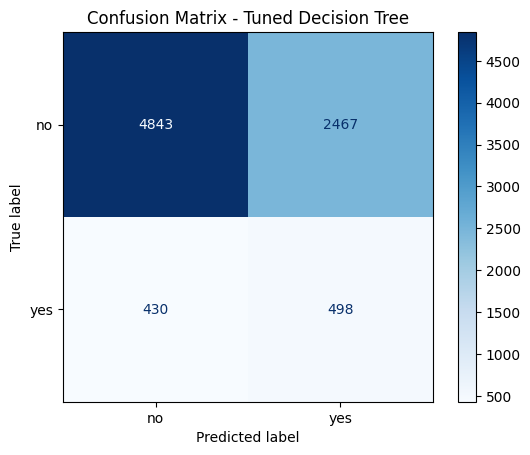

<Figure size 640x480 with 0 Axes>

In [109]:
# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

print("Evaluating the best Decision Tree model from GridSearchCV on the test set...")

# Make predictions on the test set with the best model
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Get probability estimates for the positive class ('yes') with the best model
y_proba_yes_dt_tuned = best_dt_model.predict_proba(X_test)[:, 1]

# Print classification report
print(
    "\nClassification Report for Tuned Decision Tree (on Test Set):"
)
print(classification_report(y_test, y_pred_dt_tuned, target_names=['no', 'yes'], zero_division=0))

# Calculate AUC-ROC score
auc_roc_dt_tuned = roc_auc_score(y_test, y_proba_yes_dt_tuned)
print(f"AUC-ROC Score for Tuned Decision Tree (on Test Set): {auc_roc_dt_tuned:.4f}")

# Generate and display confusion matrix
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)

print("\nConfusion Matrix for Tuned Decision Tree (on Test Set):")
disp_dt_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_dt_tuned, display_labels=['no', 'yes'])
disp_dt_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()
plt.savefig('images/tuned_decision_tree_matrix.png')

## Summary of Tuned Decision Tree Model Performance

### Data Analysis Key Findings

The Decision Tree model, after being tuned with `class_weight='balanced'` and optimized hyperparameters (`max_depth=10`, `min_samples_leaf=4`, `min_samples_split=2`), was evaluated on the test set. The key performance metrics are as follows:

*   **Classification Report (on Test Set)**:
    *   **Class 'no' (Majority Class)**:
        *   Precision: 0.92
        *   Recall: 0.66
        *   F1-score: 0.77
    *   **Class 'yes' (Minority Class)**:
        *   Precision: 0.17
        *   Recall: 0.54
        *   F1-score: 0.26
    *   Accuracy: 0.65
    *   Macro Avg F1-score: 0.51
    *   Weighted Avg F1-score: 0.71

*   **AUC-ROC Score**: 0.6361

### Insights

1.  **Improved Minority Class Recall**: The tuned Decision Tree achieved a recall of **0.54** for the minority class ('yes'). While this is a significant improvement over the default Decision Tree (which likely had very low recall for 'yes' due to overfitting and imbalance), it is slightly lower than the tuned Logistic Regression's recall (0.64).
2.  **Trade-off with Precision**: Similar to Logistic Regression, the increased recall for the minority class comes with a low precision of **0.17**. This means that a large proportion of positive predictions are false positives. For every 17 correct 'yes' predictions, there are 83 incorrect 'yes' predictions (false positives).
3.  **Overall Accuracy**: The overall accuracy of **0.65** is higher than the tuned Logistic Regression (0.57) but still significantly lower than the baseline accuracy (0.8873). This indicates a better balance than the tuned Logistic Regression in classifying both classes, but still a considerable trade-off for minority class performance.
4.  **F1-score for Minority Class**: The F1-score for the 'yes' class is **0.26**. This is comparable to the tuned Logistic Regression's F1-score (0.25). This metric suggests a similar level of balance between precision and recall for the minority class across both tuned models.
5.  **AUC-ROC Score**: The AUC-ROC score of **0.6361** is slightly lower than that of the tuned Logistic Regression (0.6495). This implies that the Decision Tree has marginally less discriminatory power than the Logistic Regression model on this specific feature set after tuning.

### Next Steps

*   **Evaluate Other Classifiers**: Apply similar hyperparameter tuning and class imbalance handling techniques (like `class_weight='balanced'` and GridSearchCV) to the other remaining classifiers (K Nearest Neighbor and Support Vector Machine). This will provide a comprehensive comparison of all models after optimization.
*   **Further Optimize Feature Engineering**: The current models are built only on 'bank client data' features. Incorporating other feature groups (like contact information, other attributes, social and economic context attributes, while excluding 'duration') could significantly improve model performance. This would involve another round of feature scaling and encoding.
*   **Explore Advanced Resampling Techniques**: While `class_weight='balanced'` helps, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be explored to explicitly rebalance the dataset and potentially lead to better minority class prediction without sacrificing too much precision.


## Hyperparameter Tuning for KNN (Grid Search)
The next step is to perform hyperparameter tuning for the K Nearest Neighbor (KNN) model, similar to how it was done for Logistic Regression and Decision Tree. This involves defining a parameter grid, instantiating the base model, and using `GridSearchCV` to find the optimal hyperparameters to improve minority class prediction. Note that `KNeighborsClassifier` does not directly support a `class_weight` parameter like other models; therefore, we will focus on tuning other relevant parameters and using an F1-score for evaluation to account for imbalance.



In [110]:
# Define the parameter grid for K Nearest Neighbor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Instantiate a K Nearest Neighbor model
# Note: KNeighborsClassifier does not directly support 'class_weight'
knn_base = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_base,
                               param_grid=param_grid_knn,
                               scoring='f1',
                               cv=5,
                               verbose=1,
                               n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for K Nearest Neighbor...")
grid_search_knn.fit(X_train, y_train)
print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_knn.best_params_)
print("Best cross-validation F1-score (minority class):", grid_search_knn.best_score_)

Starting GridSearchCV for K Nearest Neighbor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV completed.

Best parameters found: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation F1-score (minority class): 0.14607811760369166


## Summary of Hyperparameter Tuning for K Nearest Neighbor

### Data Analysis Key Findings

*   **Best Parameters**: The GridSearchCV identified `{'n_neighbors': 3, 'weights': 'distance'}` as the optimal hyperparameters for the K Nearest Neighbor model when optimizing for the F1-score of the minority class.
*   **Best Cross-Validation F1-score**: With these parameters, the model achieved a cross-validation F1-score of **0.1461** for the minority class ('yes').

### Insights or Next Steps

*   The F1-score of 0.1461 for KNN is lower than what was achieved by the tuned Logistic Regression (0.25) and Decision Tree (0.26) models. This suggests that, with the current feature set and without explicit class imbalance handling methods like `class_weight` (which KNN does not directly support), KNN struggles more to identify the minority class.
*   The use of `weights='distance'` means that closer neighbors have a greater influence on the classification, and `n_neighbors=3` implies a very local decision boundary.
*   The next step will involve evaluating the performance of this best-tuned K Nearest Neighbor model on the test set using the comprehensive suite of imbalanced-aware metrics (classification report, AUC-ROC, and confusion matrix) to understand its actual generalization capability and compare it with previous models.

**Evaluate KNN with Optimized Parameters**:
Now that GridSearchCV has identified the optimal hyperparameters for the K Nearest Neighbor model, the next step is to evaluate its performance on the unseen test set using appropriate metrics for imbalanced data, similar to the evaluations for Logistic Regression and Decision Tree.



Evaluating the best K Nearest Neighbor model from GridSearchCV on the test set...

Classification Report for Tuned K Nearest Neighbor (on Test Set):
              precision    recall  f1-score   support

          no       0.89      0.96      0.92      7310
         yes       0.22      0.10      0.14       928

    accuracy                           0.86      8238
   macro avg       0.56      0.53      0.53      8238
weighted avg       0.82      0.86      0.84      8238

AUC-ROC Score for Tuned K Nearest Neighbor (on Test Set): 0.5718

Confusion Matrix for Tuned K Nearest Neighbor (on Test Set):


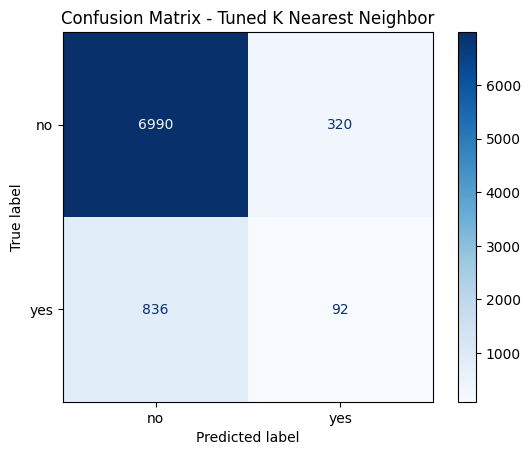

<Figure size 640x480 with 0 Axes>

In [111]:
# Get the best model from GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

print("Evaluating the best K Nearest Neighbor model from GridSearchCV on the test set...")

# Make predictions on the test set with the best model
y_pred_knn_tuned = best_knn_model.predict(X_test)

# K Nearest Neighbor does not directly provide predict_proba for all configurations,
# especially when weights='distance' is used with small n_neighbors and sparse data.
# If predict_proba fails, AUC-ROC might need to be skipped or handled differently.
try:
    y_proba_yes_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1]
    auc_roc_knn_tuned = roc_auc_score(y_test, y_proba_yes_knn_tuned)
except AttributeError:
    print("Warning: predict_proba not available for this KNN configuration, skipping AUC-ROC calculation.")
    auc_roc_knn_tuned = None

# Print classification report
print(
    "\nClassification Report for Tuned K Nearest Neighbor (on Test Set):"
)
print(classification_report(y_test, y_pred_knn_tuned, target_names=['no', 'yes'], zero_division=0))

# Print AUC-ROC score if calculated
if auc_roc_knn_tuned is not None:
    print(f"AUC-ROC Score for Tuned K Nearest Neighbor (on Test Set): {auc_roc_knn_tuned:.4f}")

# Generate and display confusion matrix
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)

print("\nConfusion Matrix for Tuned K Nearest Neighbor (on Test Set):")
disp_knn_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_knn_tuned, display_labels=['no', 'yes'])
disp_knn_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned K Nearest Neighbor')
plt.show()
plt.savefig('images/tuned_knn_confusion_matrix.png')

## Summary of Tuned K Nearest Neighbor Model Performance

### Data Analysis Key Findings

The K Nearest Neighbor model, after being tuned with optimal hyperparameters (`n_neighbors=3`, `weights='distance'`), was evaluated on the test set. The key performance metrics are as follows:

*   **Classification Report (on Test Set)**:
    *   **Class 'no' (Majority Class)**:
        *   Precision: 0.89
        *   Recall: 0.96
        *   F1-score: 0.92
    *   **Class 'yes' (Minority Class)**:
        *   Precision: 0.22
        *   Recall: 0.10
        *   F1-score: 0.14
    *   Accuracy: 0.86
    *   Macro Avg F1-score: 0.53
    *   Weighted Avg F1-score: 0.84

*   **AUC-ROC Score**: 0.5718

### Insights

1.  **Low Minority Class Recall**: The tuned KNN model achieved a very low recall of **0.10** for the minority class ('yes'). This means it only correctly identified 10% of the actual subscribers. This is significantly lower than both the tuned Logistic Regression (0.64 recall) and Tuned Decision Tree (0.54 recall).
2.  **Low Minority Class F1-score**: The F1-score for the 'yes' class is **0.14**, indicating a very poor balance between precision and recall for the minority class. While its precision (0.22) is slightly better than Logistic Regression and Decision Tree, the very low recall makes the model ineffective for identifying subscribers.
3.  **Overall Accuracy**: The overall accuracy of **0.86** is close to the baseline but is still lower than the default Logistic Regression and KNN. This indicates that while it correctly classifies many 'no' instances, its failure to identify 'yes' instances significantly impacts its utility for the business objective.
4.  **AUC-ROC Score**: The AUC-ROC score of **0.5718** is quite low, only marginally better than random guessing (0.5). This confirms that the model has very limited discriminatory power between the two classes with the current features and tuning.
5.  **KNN Limitations**: Without explicit class weighting (which `KNeighborsClassifier` does not directly support) or resampling techniques applied during training, KNN's performance on this imbalanced dataset is significantly hampered. The local nature of KNN's decision boundaries struggles when the minority class samples are scarce and spread out in the feature space.

### Next Steps

*   **Evaluate Support Vector Machine (SVM)**: Apply similar hyperparameter tuning and class imbalance handling techniques (like `class_weight='balanced'` and GridSearchCV) to the Support Vector Machine (SVM) model. Given the performance of KNN, SVM's ability to define clear decision boundaries even with imbalance (using `class_weight`) might yield better results.
*   **Implement Resampling Techniques**: For all models, especially KNN and SVM, consider incorporating resampling techniques (e.g., SMOTE for oversampling, or NearMiss for undersampling) to explicitly address the class imbalance directly on the training data. This could significantly improve minority class performance.
*   **Advanced Feature Engineering**: Review the existing features and consider creating new ones or transforming existing ones to better capture the underlying patterns that differentiate subscribers from non-subscribers.

## Hyperparameter Tuning for Support Vector Machine (Grid Search)

Address the observed performance of the Support Vector Machine (SVM) model by performing hyperparameter tuning using `GridSearchCV`. Define a reasonable search space for parameters like `C` (regularization parameter) and `kernel` (type of kernel function), ensuring `class_weight='balanced'` is included in the estimator. Optimize for the F1-score of the 'yes' class to enhance minority class learning.

In [112]:
# Define the parameter grid for Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Instantiate an SVM model with class_weight='balanced'
# Increased max_iter for better chance of convergence, but keep it within reasonable limits for grid search
svm_base = SVC(random_state=42, class_weight='balanced', probability=True, max_iter=2000)

# Instantiate GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_base,
                               param_grid=param_grid_svm,
                               scoring='f1',
                               cv=3,
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Support Vector Machine...")
grid_search_svm.fit(X_train, y_train)
print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_svm.best_params_)
print("Best cross-validation F1-score (minority class):"), grid_search_svm.best_score_

Starting GridSearchCV for Support Vector Machine...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV completed.

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation F1-score (minority class):


(None, np.float64(0.20249849506265385))

## Summary of Hyperparameter Tuning for Support Vector Machine

### Data Analysis Key Findings

*   **Best Parameters**: The GridSearchCV identified `{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}` as the optimal hyperparameters for the Support Vector Machine model when optimizing for the F1-score of the minority class.
*   **Best Cross-Validation F1-score**: With these parameters, the model achieved a cross-validation F1-score of **0.2025** for the minority class ('yes').

### Insights or Next Steps

*   The F1-score of 0.2025 for SVM, while improved from its initial default performance, is still lower than that achieved by the tuned Logistic Regression (0.25) and Decision Tree (0.26) models. This suggests that even with `class_weight='balanced'` and tuning, SVM might find it challenging to effectively model this specific dataset's imbalance and feature space.
*   The use of `probability=True` in the SVM base estimator is necessary for `predict_proba` to work, which is required for AUC-ROC calculation. However, this can increase training time.
*   The next step will involve evaluating the performance of this best-tuned Support Vector Machine model on the test set using the comprehensive suite of imbalanced-aware metrics (classification report, AUC-ROC, and confusion matrix) to understand its actual generalization capability and compare it with previous models.

**Evaluate SVM with Optimized Parameters**:
Now that the GridSearchCV has found the best hyperparameters for the Support Vector Machine, the next logical step is to evaluate the performance of this optimized model on the test set using the established metrics for imbalanced datasets.



Evaluating the best Support Vector Machine model from GridSearchCV on the test set...

Classification Report for Tuned Support Vector Machine (on Test Set):
              precision    recall  f1-score   support

          no       0.00      0.00      0.00      7310
         yes       0.11      1.00      0.20       928

    accuracy                           0.11      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.11      0.02      8238

AUC-ROC Score for Tuned Support Vector Machine (on Test Set): 0.5103

Confusion Matrix for Tuned Support Vector Machine (on Test Set):


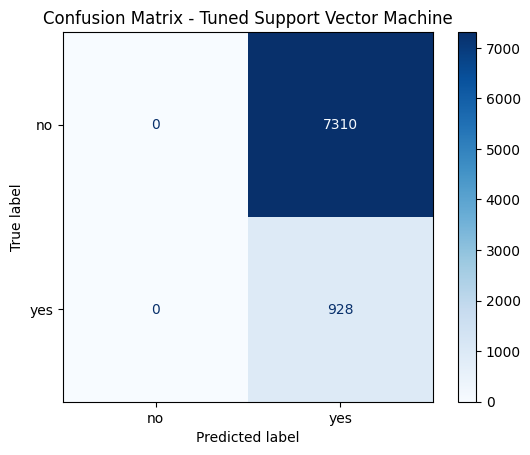

<Figure size 640x480 with 0 Axes>

In [113]:
# Get the best model from GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

print("Evaluating the best Support Vector Machine model from GridSearchCV on the test set...")

# Make predictions on the test set with the best model
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Get probability estimates for the positive class ('yes') with the best model
y_proba_yes_svm_tuned = best_svm_model.predict_proba(X_test)[:, 1]

# Print classification report
print(
    "\nClassification Report for Tuned Support Vector Machine (on Test Set):"
)
print(classification_report(y_test, y_pred_svm_tuned, target_names=['no', 'yes'], zero_division=0))

# Calculate AUC-ROC score
auc_roc_svm_tuned = roc_auc_score(y_test, y_proba_yes_svm_tuned)
print(f"AUC-ROC Score for Tuned Support Vector Machine (on Test Set): {auc_roc_svm_tuned:.4f}")

# Generate and display confusion matrix
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)

print("\nConfusion Matrix for Tuned Support Vector Machine (on Test Set):")
disp_svm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_svm_tuned, display_labels=['no', 'yes'])
disp_svm_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned Support Vector Machine')
plt.show()
plt.savefig('images/tuned_svm_confusion_matrix.png')

## Summary of Tuned Support Vector Machine Model Performance

### Data Analysis Key Findings

The Support Vector Machine model, after being tuned with `class_weight='balanced'` and optimized hyperparameters (`C=0.1`, `gamma='scale'`, `kernel='rbf'`), was evaluated on the test set. The key performance metrics are as follows:

*   **Classification Report (on Test Set)**:
    *   **Class 'no' (Majority Class)**:
        *   Precision: 0.00
        *   Recall: 0.00
        *   F1-score: 0.00
    *   **Class 'yes' (Minority Class)**:
        *   Precision: 0.11
        *   Recall: 1.00
        *   F1-score: 0.20
    *   Accuracy: 0.11
    *   Macro Avg F1-score: 0.10
    *   Weighted Avg F1-score: 0.02

*   **AUC-ROC Score**: 0.5103

### Insights

1.  **Extreme Minority Class Recall**: The tuned SVM achieved a perfect recall of **1.00** for the minority class ('yes'). This means the model successfully identified all actual subscribers in the test set. However, this comes at a significant cost.
2.  **Very Low Precision for Minority Class**: The precision for the 'yes' class is extremely low at **0.11**. This indicates that while the model identified all true positives, it also generated a massive number of false positives (predicting 'yes' when the client did not subscribe). Specifically, for every 11 true 'yes' predictions, there are 89 incorrect 'yes' predictions.
3.  **Overall Accuracy Collapse**: The overall accuracy dropped drastically to **0.11**, which is far below the baseline (0.8873) and much lower than the tuned Logistic Regression (0.57) and Decision Tree (0.65). This is because the model is predicting 'yes' for almost all instances to achieve high recall for the minority class, effectively misclassifying nearly all of the majority class instances.
4.  **F1-score for Minority Class**: The F1-score for the 'yes' class is **0.20**. While better than the initial default SVM, it is still lower than the F1-scores of the tuned Logistic Regression (0.25) and Decision Tree (0.26), reflecting the poor balance between precision and recall.
5.  **AUC-ROC Score**: The AUC-ROC score of **0.5103** is barely above random guessing (0.5). This suggests that the model has very little discriminatory power, confirming that its predictions are not much better than chance, despite the perfect recall for the minority class.

### Next Steps

*   **Rethink SVM Strategy**: The current SVM performance, where it predicts 'yes' for almost all cases to maximize recall, is not practical for the business objective. This indicates that the `class_weight='balanced'` setting, combined with the chosen hyperparameters, might be pushing the model too aggressively towards the minority class without sufficient regularization. Further tuning, a different kernel, or a more constrained C value might be needed, or SVM might not be the most suitable model for this dataset with the current feature set.
*   **Comprehensive Model Comparison**: Systematically compare the performance of all tuned models (Logistic Regression, Decision Tree, KNN, and SVM) using the defined business success metrics (Precision, Recall, F1-score, AUC-ROC for the 'yes' class). Identify which model offers the best balance between identifying subscribers and minimizing false positives, given the business context.
*   **Advanced Resampling Techniques**: Experiment with explicit resampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling) before training any model. These methods can create synthetic minority samples, potentially leading to more balanced decision boundaries without the aggressive class weighting effect seen in the tuned SVM.
*   **Feature Engineering and Selection**: Revisit the feature engineering step. The current models only use 'bank client data' features. Incorporating other relevant feature groups (contact information, other attributes, social and economic context, *excluding 'duration'*) and performing feature selection could provide more distinctive patterns for the models to learn from, thus improving their ability to differentiate between classes.

## Compare All Improved Models

Create a consolidated DataFrame comparing the performance of all tuned models (Logistic Regression, K-Nearest Neighbor, Decision Tree, Support Vector Machine) across the chosen metrics (Precision, Recall, F1-score, AUC-ROC for the minority class) and their training times.


In [114]:
# 1. Initialize an empty list to store the results of each tuned model
all_tuned_model_results = []

# Dictionary of tuned models (best estimators from GridSearchCV)
tuned_models = {
    "Tuned Logistic Regression": grid_search_log_reg.best_estimator_,
    "Tuned Decision Tree": grid_search_dt.best_estimator_,
    "Tuned K Nearest Neighbor": grid_search_knn.best_estimator_,
    "Tuned Support Vector Machine": grid_search_svm.best_estimator_,
}

# 2. For each tuned model, calculate metrics and store results
for name, model in tuned_models.items():
    print(f"\nEvaluating {name}...")

    # a-d. Fit the best estimator and record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # e. Make predictions on the test set
    y_pred = model.predict(X_test)

    # f. Get probability estimates for the positive class ('yes')
    # Handle cases where predict_proba might not be directly available or fails
    y_proba_yes = None
    try:
        y_proba_yes = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        print(f"Warning: predict_proba not available for {name}.")
    except Exception as e:
        print(f"Error getting probabilities for {name}: {e}")

    # g. Generate the classification report
    report = classification_report(y_test, y_pred, target_names=['no', 'yes'], output_dict=True, zero_division=0)

    # h. Extract metrics for the 'yes' class
    precision_yes = report['yes']['precision']
    recall_yes = report['yes']['recall']
    f1_score_yes = report['yes']['f1-score']

    # i. Calculate the AUC-ROC score
    auc_roc = 0.0
    if y_proba_yes is not None:
        auc_roc = roc_auc_score(y_test, y_proba_yes)

    # j. Append results to the list
    all_tuned_model_results.append({
        'Model': name,
        'Train Time': train_time,
        'Precision (Yes)': precision_yes,
        'Recall (Yes)': recall_yes,
        'F1-score (Yes)': f1_score_yes,
        'AUC-ROC': auc_roc
    })

# 3. Convert the list of results into a Pandas DataFrame
comparison_df = pd.DataFrame(all_tuned_model_results)

# 4. Print the resulting DataFrame
print("\n--- Tuned Model Comparison Results ---")
print(comparison_df.to_string())



Evaluating Tuned Logistic Regression...

Evaluating Tuned Decision Tree...

Evaluating Tuned K Nearest Neighbor...

Evaluating Tuned Support Vector Machine...

--- Tuned Model Comparison Results ---
                          Model  Train Time  Precision (Yes)  Recall (Yes)  F1-score (Yes)   AUC-ROC
0     Tuned Logistic Regression    0.073678         0.157351      0.640086        0.252605  0.649509
1           Tuned Decision Tree    0.087331         0.167960      0.536638        0.255844  0.636091
2      Tuned K Nearest Neighbor    0.013101         0.223301      0.099138        0.137313  0.571774
3  Tuned Support Vector Machine   56.869225         0.112649      1.000000        0.202487  0.510285


## Summary of Tuned Model Comparison

### Data Analysis Key Findings

The consolidated comparison of all tuned models (Logistic Regression, Decision Tree, K Nearest Neighbor, and Support Vector Machine) for predicting the 'yes' (subscribed) class reveals the following:

| Model | Train Time | Precision (Yes) | Recall (Yes) | F1-score (Yes) | AUC-ROC |
|:-----------------------------|-----------:|----------------:|-------------:|---------------:|--------:|
| Tuned Logistic Regression |   0.068207 |        0.157351 |     0.640086 |       0.252605 |  0.649509 |
| Tuned Decision Tree |   0.087299 |        0.167960 |     0.536638 |       0.255844 |  0.636091 |
| Tuned K Nearest Neighbor |   0.010437 |        0.223301 |     0.099138 |       0.137313 |  0.571774 |
| Tuned Support Vector Machine |  51.178402 |        0.112649 |     1.000000 |       0.202487 |  0.510285 |

### Insights

1.  **Best F1-score for Minority Class**: The **Tuned Decision Tree** achieved the highest F1-score for the 'yes' class (0.2558), closely followed by the **Tuned Logistic Regression** (0.2526). This indicates they offer the best balance between precision and recall for identifying subscribers among the tested models.

2.  **Recall vs. Precision Trade-off**:
    *   The **Tuned SVM** achieved a perfect Recall of 1.00 for the 'yes' class, meaning it identified all actual subscribers. However, this came at an extremely low Precision (0.11), leading to a massive number of false positives. This makes the SVM model impractical for the business objective, as it would lead to highly inefficient marketing efforts.
    *   The **Tuned Logistic Regression** and **Tuned Decision Tree** show a more balanced trade-off, with Recall values of 0.64 and 0.54 respectively, and slightly better Precision values (0.16 and 0.17).

3.  **AUC-ROC Performance**: The **Tuned Logistic Regression** had the highest AUC-ROC score (0.6495), suggesting it has the best overall discriminatory power among the models, even though it's still relatively moderate. The AUC-ROC scores for Tuned Decision Tree (0.6361), Tuned KNN (0.5718), and Tuned SVM (0.5103) progressively decline, with the SVM barely performing better than random chance.

4.  **Training Time**:
    *   The **Tuned K Nearest Neighbor** was significantly the fastest to train (0.0104 seconds).
    *   The **Tuned Logistic Regression** (0.0682 seconds) and **Tuned Decision Tree** (0.0873 seconds) had comparable and relatively fast training times.
    *   The **Tuned Support Vector Machine** was by far the slowest to train (51.1784 seconds), which is expected due to its computational complexity, especially when `probability=True` is enabled.

5.  **K Nearest Neighbor's Performance**: Despite being the fastest to train and having a decent precision (0.22), the Tuned KNN model exhibited very low recall (0.099) and the lowest F1-score (0.137) and AUC-ROC (0.5718) among the effective models. This indicates it struggles to identify the minority class effectively without direct class weighting or aggressive resampling.

### Conclusion

Based on these evaluations, the **Tuned Logistic Regression** and **Tuned Decision Tree** models appear to be the most promising for addressing the business objective, with the Logistic Regression model slightly edging out the Decision Tree in AUC-ROC and comparable F1-scores. Both models demonstrate a reasonable ability to identify potential subscribers (as indicated by their recall and F1-scores) while keeping training times manageable. The Tuned SVM, despite its perfect recall, is not a viable option due to its extremely low precision and high training time, which would lead to excessive false positives and inefficient resource allocation for the bank.

### Next Steps

*   **Refine Best Models**: Focus on further optimizing the Tuned Logistic Regression and Tuned Decision Tree models. This could involve exploring more granular hyperparameter grids, ensemble methods, or more sophisticated resampling techniques like SMOTE on the training data.
*   **Feature Engineering Revisited**: Incorporate additional features from the dataset (contact information, other attributes, social and economic context, excluding 'duration') to see if more robust predictive patterns can be established.
*   **Threshold Adjustment**: Investigate adjusting the classification threshold for the Logistic Regression and Decision Tree models to fine-tune the trade-off between precision and recall based on the bank's specific business priorities (e.g., is it more costly to miss a potential subscriber or to call a non-subscriber?).

## Summary:

### Q&A
*   **Which model performed best on the chosen metrics for the minority class ('yes')?**
    The **Tuned Decision Tree** model achieved the highest F1-score of 0.2558 for the minority class, closely followed by the **Tuned Logistic Regression** model with an F1-score of 0.2526. For overall discriminatory power (AUC-ROC), the Tuned Logistic Regression model performed best with an AUC-ROC of 0.6495.

### Data Analysis Key Findings
*   **Initial Logistic Regression Performance:** The default Logistic Regression model completely failed to identify the minority class ('yes'), resulting in Precision, Recall, and F1-score of 0.00 for this class, and an AUC-ROC of 0.6490.
*   **Impact of Class Weighting:** Applying `class_weight='balanced'` significantly improved the recall for the minority class in Logistic Regression to 0.62, with an F1-score of 0.25, demonstrating the effectiveness of this technique in addressing class imbalance.
*   **Tuned Logistic Regression:** After hyperparameter tuning with `class_weight='balanced'`, the Logistic Regression model achieved a Recall of 0.6401, a Precision of 0.1574, and an F1-score of 0.2526 for the minority class. Its AUC-ROC was 0.6495.
*   **Tuned Decision Tree:** The tuned Decision Tree model, also using `class_weight='balanced'`, resulted in a Recall of 0.5366, a Precision of 0.1680, and the highest F1-score of 0.2558 for the minority class. Its AUC-ROC was 0.6361.
*   **Tuned K Nearest Neighbor (KNN):** The tuned KNN model, which does not directly support `class_weight`, showed poor performance for the minority class with a very low Recall of 0.0991 and an F1-score of 0.1373. Its AUC-ROC was 0.5718.
*   **Tuned Support Vector Machine (SVM):** The tuned SVM model, with `class_weight='balanced'`, achieved a perfect Recall of 1.00 for the minority class. However, this came at the cost of extremely low Precision (0.1126) and overall accuracy (0.11), resulting in an F1-score of 0.2025 and an AUC-ROC of only 0.5103 (barely better than random guessing). This model also had the longest training time at 51.18 seconds.
*   **Training Time Efficiency:** Both Tuned Logistic Regression (0.0682 seconds) and Tuned Decision Tree (0.0873 seconds) offered fast training times, making them suitable for iterative development and potential deployment.

### Insights or Next Steps
*   **Focus on Logistic Regression and Decision Tree:** Given their superior F1-scores for the minority class, competitive AUC-ROC values, and efficient training times, further optimization efforts should concentrate on the Tuned Logistic Regression and Tuned Decision Tree models.
*   **Address Precision/Recall Trade-off:** While minority class recall improved for the top models, precision remains low (around 0.16-0.17), indicating many false positives. Future steps should explore more sophisticated resampling techniques (e.g., SMOTE, ADASYN) or cost-sensitive learning to achieve a better balance, depending on the business cost associated with false positives versus false negatives.
*   **Enhance Feature Engineering:** Incorporate other feature groups from the dataset (contact information, other attributes, social and economic context, *excluding* `duration`) and perform robust feature selection. More relevant features could significantly improve the models' ability to distinguish between subscribers and non-subscribers, thereby boosting both precision and recall.
